In [64]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [65]:
df=pd.read_csv("C:/Users/HP Metal/Downloads/df_limpio.csv")
df

Unnamed: 0  Sesion  Recorrido     Circuito  Clima Calido  Clima frio  \
0            5.0  1983.0        1.0  jacarepagua         False         0.0   
1            6.0  1983.0        1.0  jacarepagua         False         0.0   
2            8.0  1983.0        1.0  jacarepagua         False         0.0   
3           22.0  1983.0        1.0  jacarepagua         False         0.0   
4           17.0  1983.0        1.0  jacarepagua         False         0.0   
...          ...     ...        ...          ...           ...         ...   
7512       299.0  1983.0       12.0    zandvoort         False         0.0   
7513     10066.0  2009.0        5.0    catalunya          True         0.0   
7514      5893.0  1997.0       13.0        monza         False         0.0   
7515      9746.0  2008.0        7.0   villeneuve          True         0.0   
7516       434.0  1984.0        3.0       zolder         False         0.0   

      Clima seco  Clima lluvioso  Clima nublado      Piloto  ... Grilla Podio  \
0           True             0.0          False       prost  ...      2     6   
1           True             0.0          False     warwick  ...      5     7   
2           True             0.0          False      arnoux  ...      6     9   
3           True             0.0          False     patrese  ...      7    23   
4           True             0.0          False     cheever  ...      8    18   
...          ...             ...            ...         ...  ...    ...   ...   
7512       False             0.0           True     laffite  ...     17    20   
7513       False             0.0          False       sutil  ...     19    20   
7514        True             0.0          False      irvine  ...     10     8   
7515       False             0.0          False  fisichella  ...     17    14   
7516       False             0.0          False      arnoux  ...      2     3   

      Puntos_piloto  Victorias_piloto  Posicion_piloto  Puntos_constructores  \
0               0.0               0.0              0.0                   0.0   
1               0.0               0.0              0.0                   0.0   
2               0.0               0.0              0.0                   0.0   
3               0.0               0.0              0.0                   0.0   
4               0.0               0.0              0.0                   0.0   
...             ...               ...              ...                   ...   
7512           11.0               0.0              9.0                  36.0   
7513            0.0               0.0             16.0                   0.0   
7514           18.0               0.0              6.0                  84.0   
7515            0.0               0.0             18.0                   0.0   
7516            0.0               0.0             23.0                   0.0   

      Victorias_constructores  Constructores_posicion  tiempo_clasificación  \
0                         0.0                       0                   0.2   
1                         0.0                       0                   0.7   
2                         0.0                       0                   1.0   
3                         0.0                       0                   1.5   
4                         0.0                       0                   1.6   
...                       ...                     ...                   ...   
7512                      1.0                       4                   4.4   
7513                      0.0                      10                   1.2   
7514                      4.0                       1                   0.9   
7515                      0.0                      10                   1.3   
7516                      0.0                      11                   0.6   

      Edad_piloto  
0            28.0  
1            28.0  
2            34.0  
3            28.0  
4            25.0  
...           ...  
7512         39.0  
7513         26.0  
7514  

In [66]:
df.shape

(7517, 22)

In [67]:
df.dtypes

Unnamed: 0                 float64
Sesion                     float64
Recorrido                  float64
Circuito                    object
Clima Calido                  bool
Clima frio                 float64
Clima seco                    bool
Clima lluvioso             float64
Clima nublado                 bool
Piloto                      object
Nacionalidad                object
Constructores               object
Grilla                       int64
Podio                        int64
Puntos_piloto              float64
Victorias_piloto           float64
Posicion_piloto            float64
Puntos_constructores       float64
Victorias_constructores    float64
Constructores_posicion       int64
tiempo_clasificación       float64
Edad_piloto                float64
dtype: object

In [68]:
Var_num = ["Sesion", "Recorrido", "Clima frio", "Clima lluvioso", "Puntos_piloto", "Victorias_piloto", "Posicion_piloto", "Puntos_constructores", 
"tiempo_clasificación", "Edad_piloto", "Victorias_constructores"]

In [69]:
for columna in Var_num:
    if columna in df.columns:
        print("Variable:", columna)
        print(df[columna].describe())
        print("Mediana:", df[columna].median())
        print("                              ")

Variable: Sesion
count    7517.000000
mean     2001.672875
std        11.235319
min      1983.000000
25%      1992.000000
50%      2001.000000
75%      2012.000000
max      2021.000000
Name: Sesion, dtype: float64
Mediana: 2001.0
                              
Variable: Recorrido
count    7517.000000
mean        9.223360
std         5.120917
min         1.000000
25%         5.000000
50%         9.000000
75%        13.000000
max        21.000000
Name: Recorrido, dtype: float64
Mediana: 9.0
                              
Variable: Clima frio
count    7517.000000
mean        0.019689
std         0.138937
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: Clima frio, dtype: float64
Mediana: 0.0
                              
Variable: Clima lluvioso
count    7517.000000
mean        0.092324
std         0.289502
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: Clima lluv

In [70]:
Var_cat = ["Circuito", "Piloto", "Nacionalidad", "Constructores"]

In [71]:
for columna in Var_cat:
    if columna in df.columns:
        print("Variable:", columna)
        print(df[columna].describe())
        print("                    ")

Variable: Circuito
count      7517
unique       50
top       monza
freq        463
Name: Circuito, dtype: object
                    
Variable: Piloto
count          7309
unique          226
top       raikkonen
freq            170
Name: Piloto, dtype: object
                    
Variable: Nacionalidad
count        7517
unique         34
top       British
freq         1112
Name: Nacionalidad, dtype: object
                    
Variable: Constructores
count        7301
unique         66
top       mclaren
freq          663
Name: Constructores, dtype: object
                    


Variable numérica: Sesion


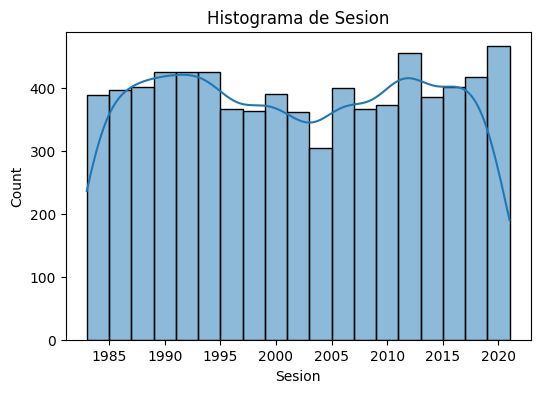

Variable numérica: Recorrido


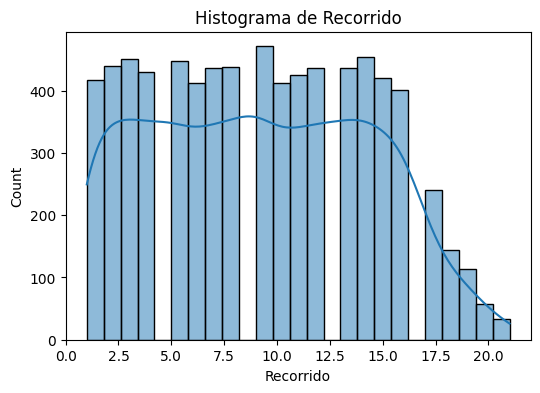

Variable numérica: Clima frio


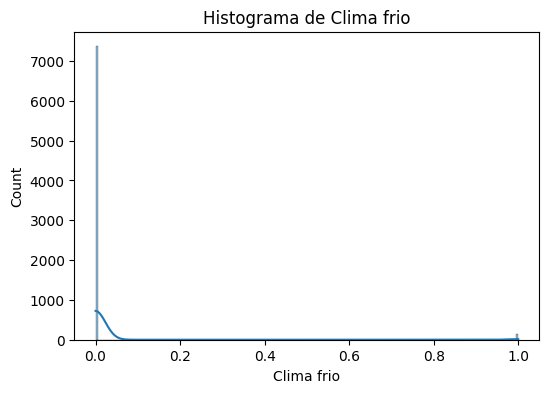

Variable numérica: Clima lluvioso


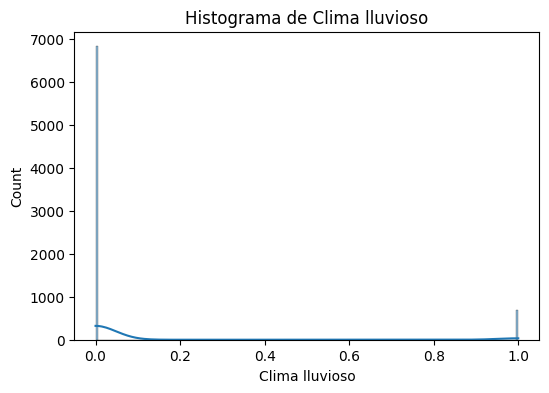

Variable numérica: Puntos_piloto


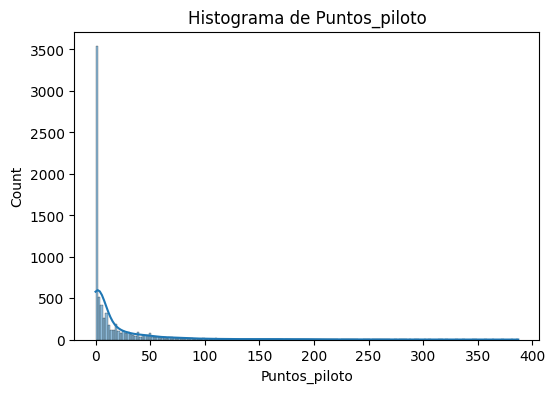

Variable numérica: Victorias_piloto


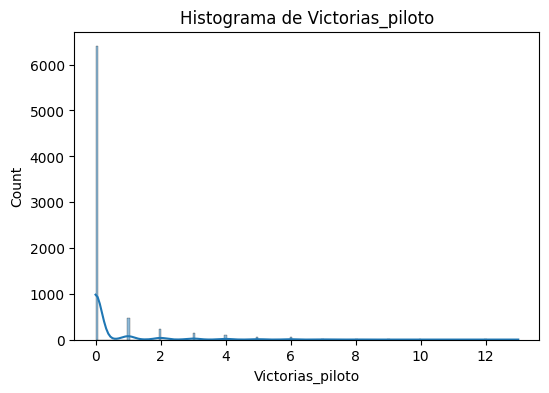

Variable numérica: Posicion_piloto


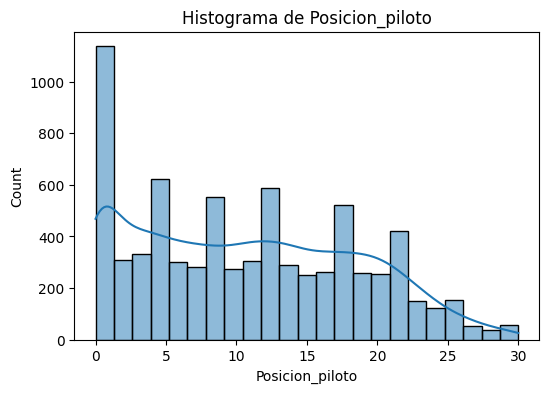

Variable numérica: Puntos_constructores


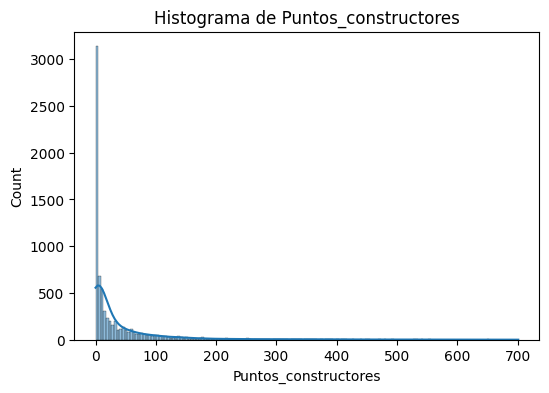

Variable numérica: tiempo_clasificación


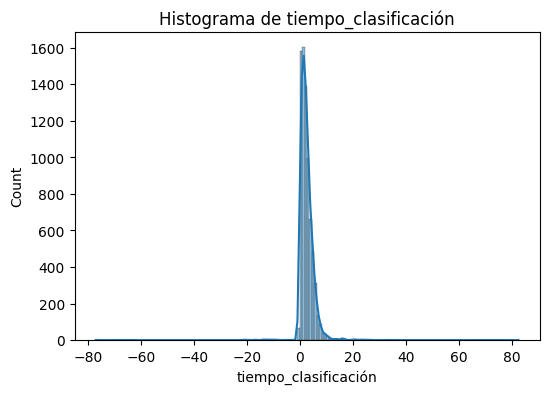

Variable numérica: Edad_piloto


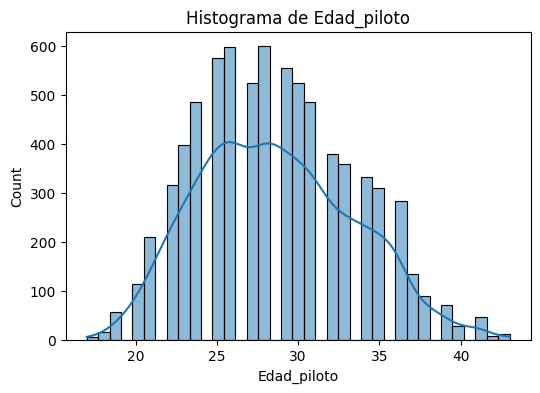

Variable numérica: Victorias_constructores


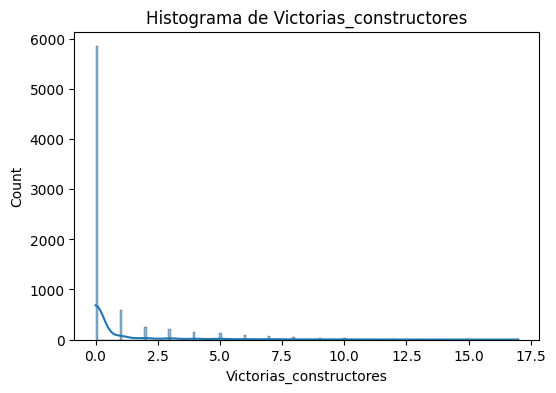

In [72]:
for columna in Var_num:
    if columna in df.columns:
        print("Variable numérica:", columna)

        # Histograma
        plt.figure(figsize=(6,4))
        sns.histplot(df[columna], kde=True)
        plt.title("Histograma de " + columna)
        plt.show()

Variable numérica: Sesion


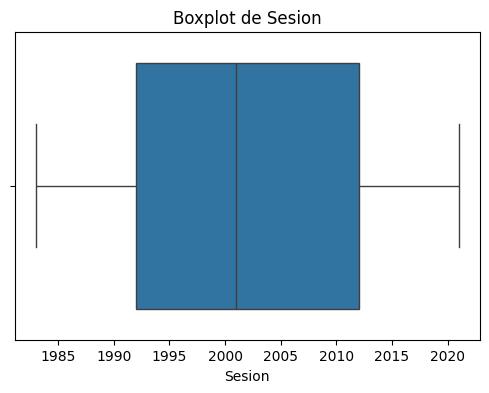

Variable numérica: Recorrido


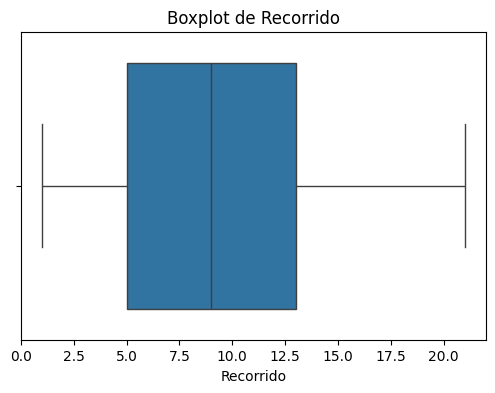

Variable numérica: Clima frio


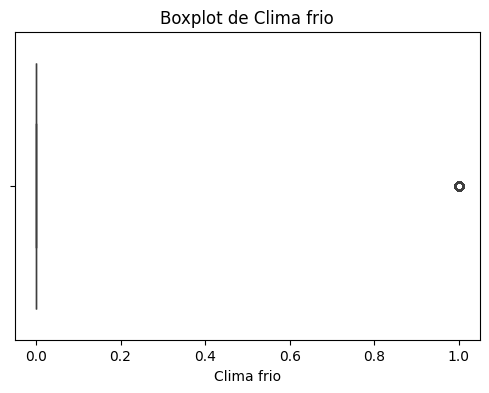

Variable numérica: Clima lluvioso


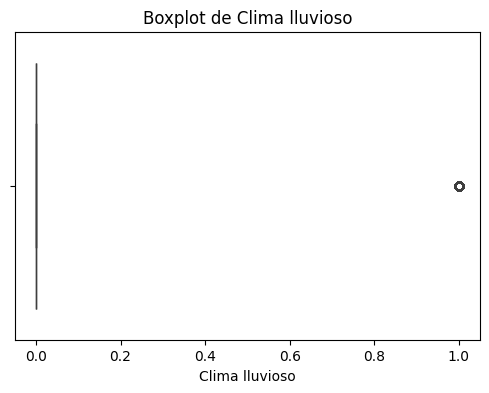

Variable numérica: Puntos_piloto


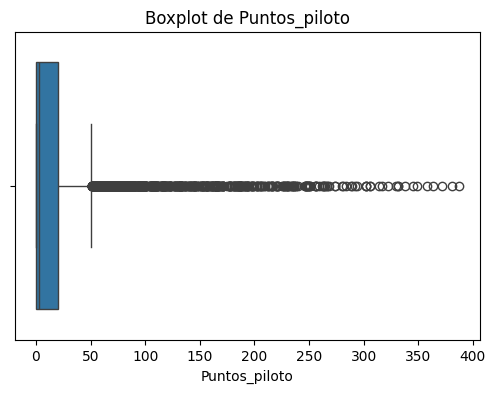

Variable numérica: Victorias_piloto


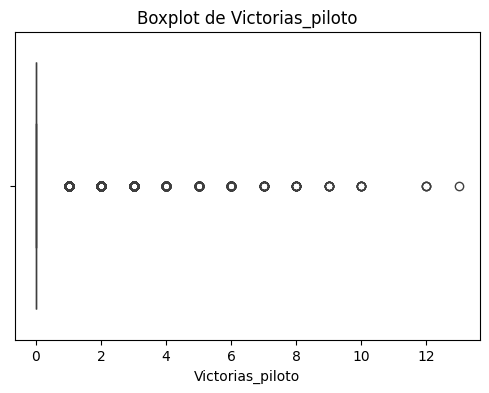

Variable numérica: Posicion_piloto


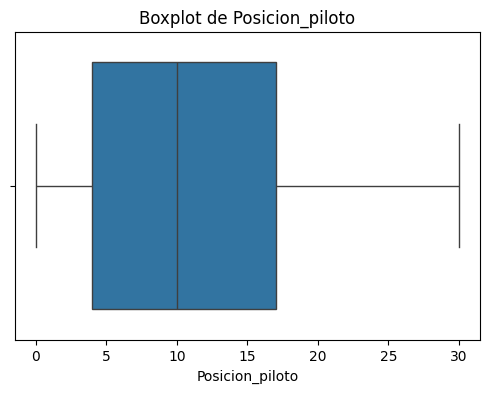

Variable numérica: Puntos_constructores


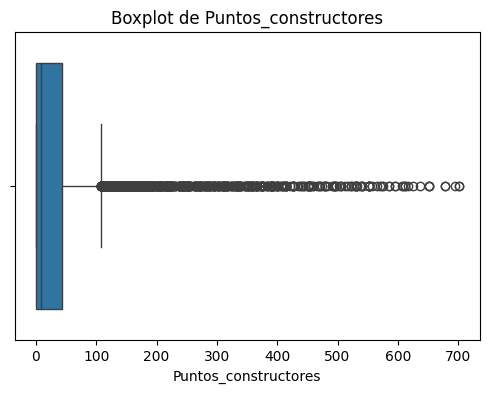

Variable numérica: tiempo_clasificación


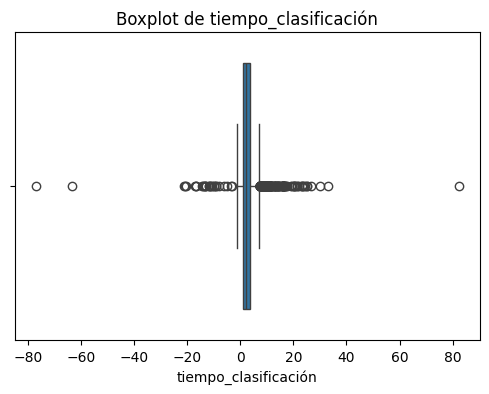

Variable numérica: Edad_piloto


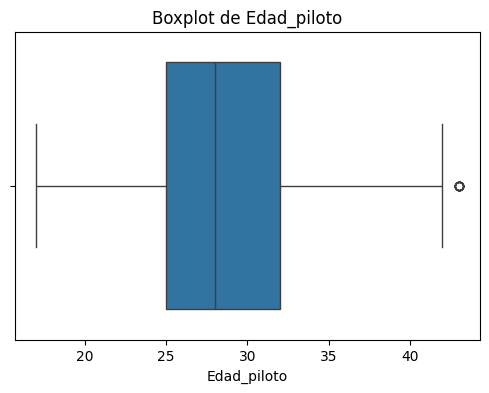

Variable numérica: Victorias_constructores


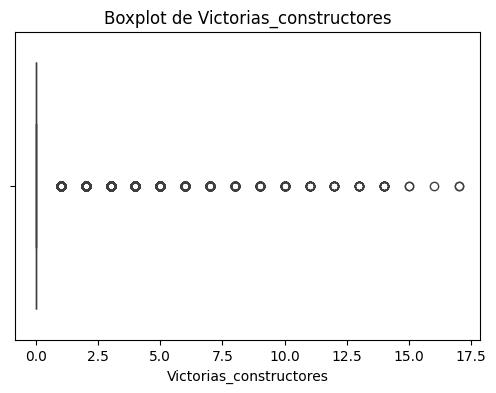

In [73]:
for columna in Var_num:
    if columna in df.columns:
        print("Variable numérica:", columna)
        # Boxplot
        plt.figure(figsize=(6,4))
        sns.boxplot(x=df[columna])
        plt.title("Boxplot de " + columna)
        plt.show()


Variable numérica: Circuito


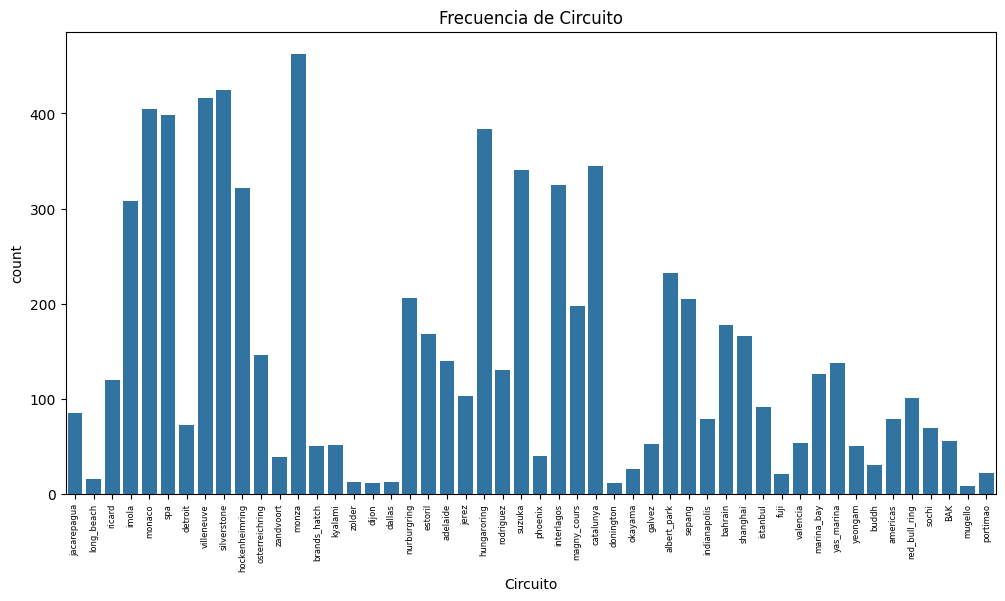

Variable numérica: Piloto


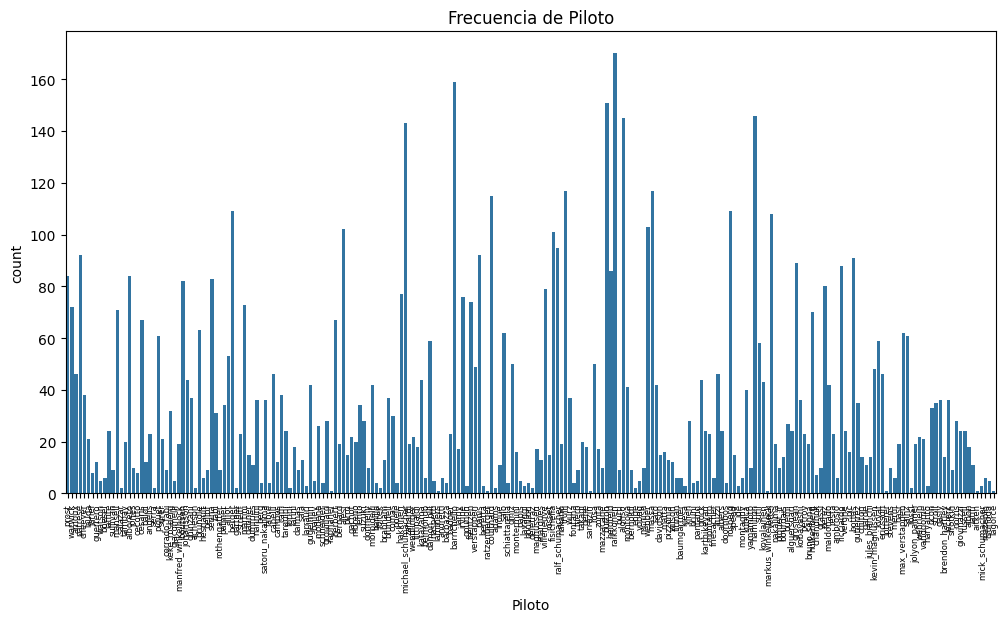

Variable numérica: Nacionalidad


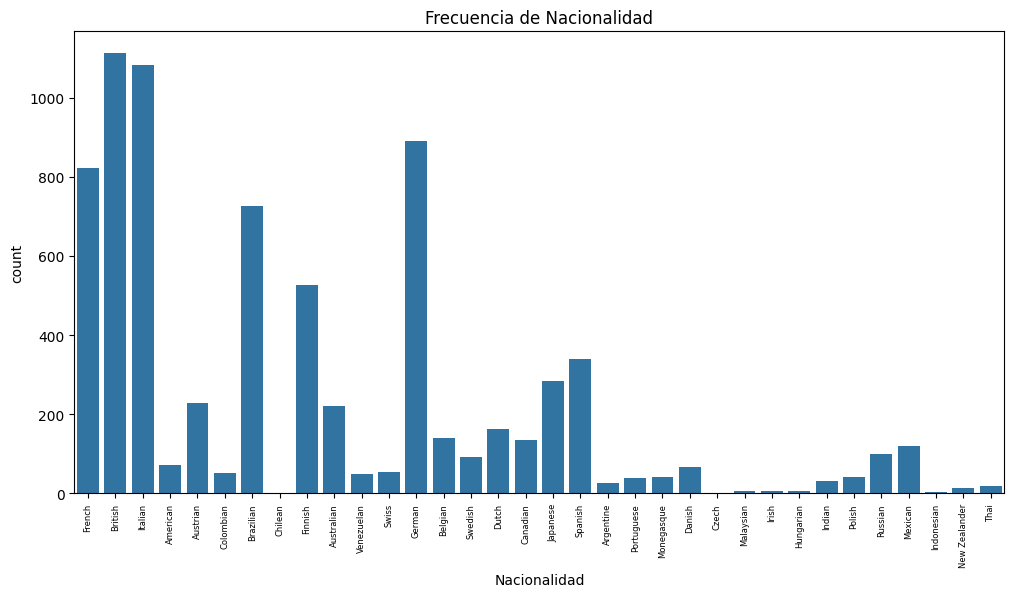

Variable numérica: Constructores


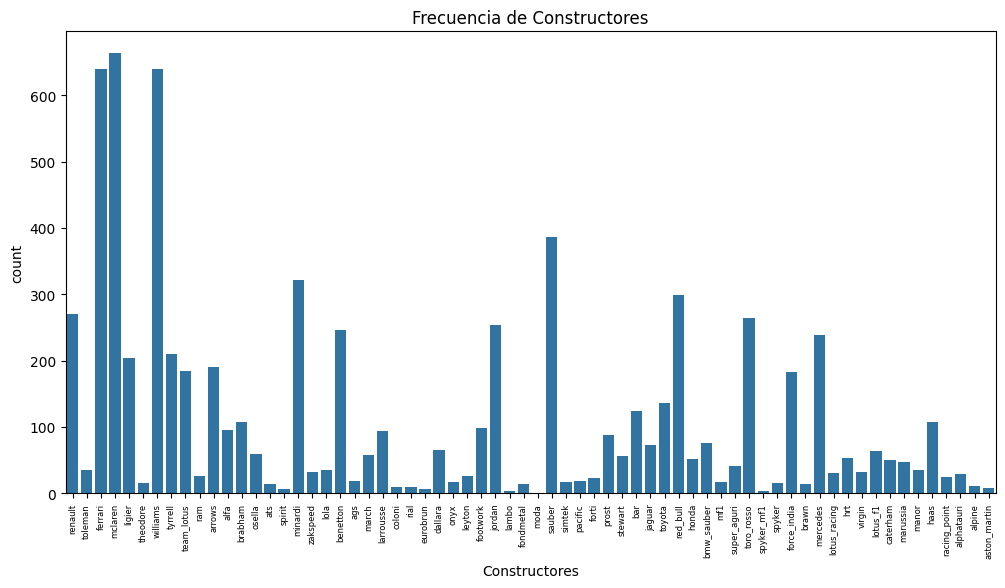

In [74]:
for columna in Var_cat:
    if columna in df.columns:
        print("Variable numérica:", columna)
        #Grafica de barras
        plt.figure(figsize= (12,6))
        sns.countplot(x=df[columna])
        plt.title("Frecuencia de " + columna)
        plt.xticks(rotation=90, fontsize=6)
        plt.show()

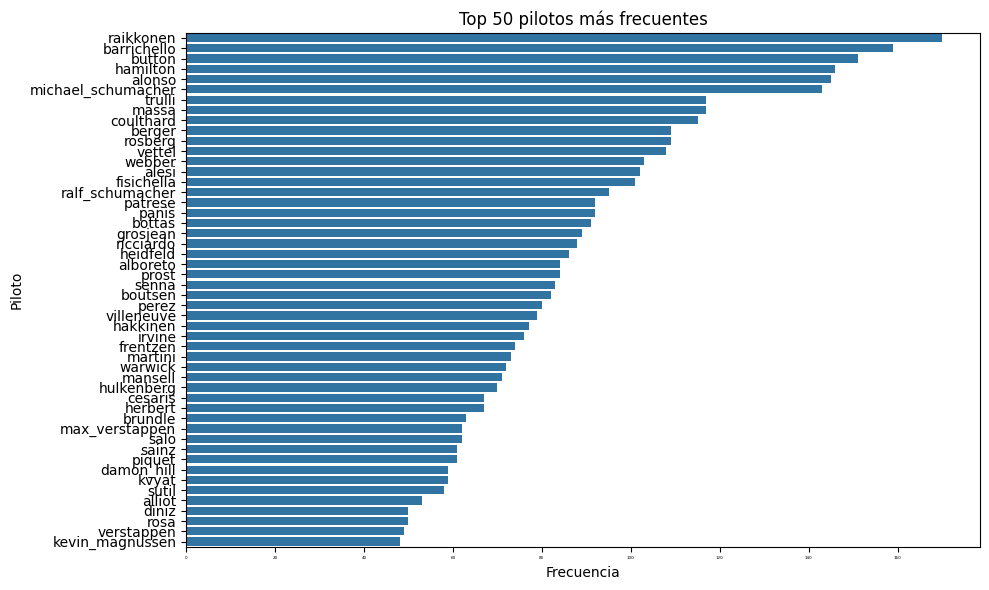

In [75]:
#Grafica de barras frecuencia de pilotos (Sale un saturada arriba)
plt.figure(figsize=(10,6))
top50=df["Piloto"].value_counts().head(50)
sns.barplot(x=top50.values, y=top50.index)
plt.title("Top 50 pilotos más frecuentes")
plt.xlabel("Frecuencia")
plt.ylabel("Piloto")
plt.xticks(fontsize=3)
plt.tight_layout()
plt.show()


Matriz de correlación:
                           Sesion  Recorrido  Clima frio  Clima lluvioso  \
Sesion                   1.000000   0.114534   -0.133951        0.054323   
Recorrido                0.114534   1.000000   -0.020955       -0.031502   
Clima frio              -0.133951  -0.020955    1.000000        0.153271   
Clima lluvioso           0.054323  -0.031502    0.153271        1.000000   
Puntos_piloto            0.337249   0.357539   -0.040869       -0.014558   
Victorias_piloto         0.055708   0.193272   -0.000622       -0.012180   
Posicion_piloto         -0.081749   0.199422    0.026418        0.016546   
Puntos_constructores     0.347237   0.375617   -0.043850       -0.010396   
tiempo_clasificación    -0.222762  -0.038492    0.071904        0.001934   
Edad_piloto             -0.217739   0.014398    0.029861       -0.014201   
Victorias_constructores  0.069083   0.246773   -0.008894       -0.005378   

                         Puntos_piloto  Victorias_piloto  Posici

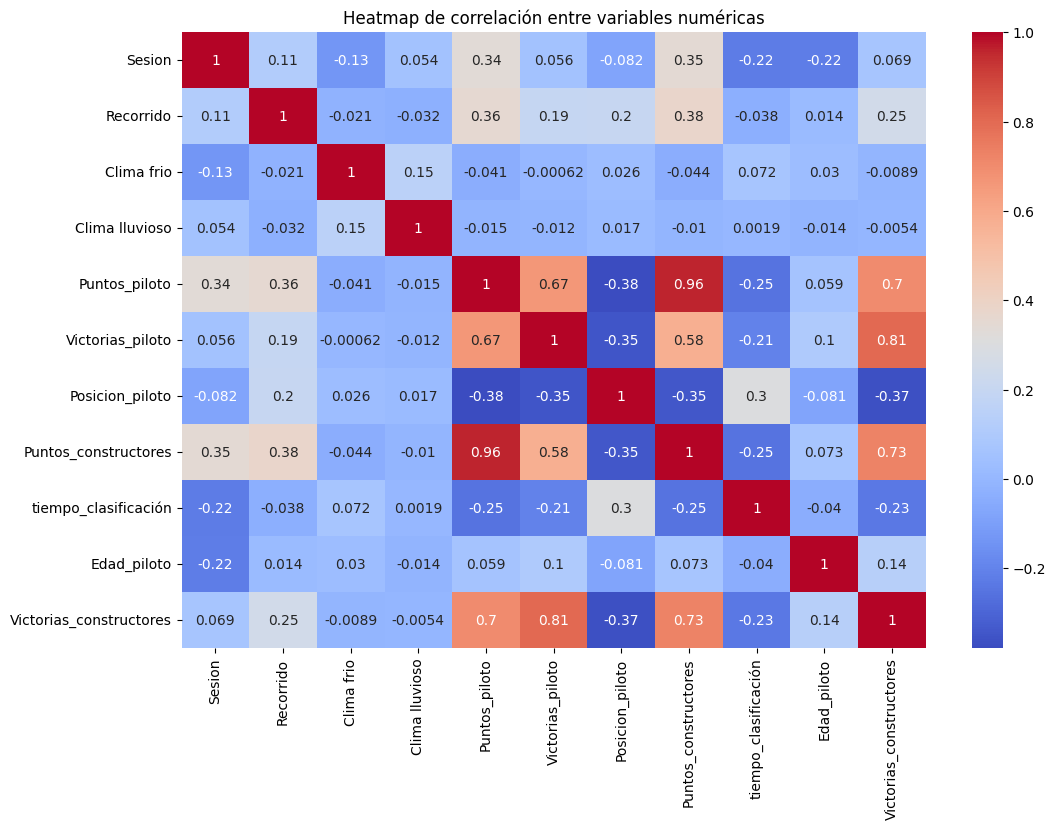

In [76]:
if len(Var_num) > 0:
    corr_matrix = df[Var_num].corr()
    print("Matriz de correlación:")
    print(corr_matrix)
    # Heatmap
    plt.figure(figsize=(12,8))
    sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
    plt.title("Heatmap de correlación entre variables numéricas")
    plt.show()
else:
    print("No hay variables numéricas para calcular la correlación.")

Gráfico de dispersión entre Sesion y Circuito


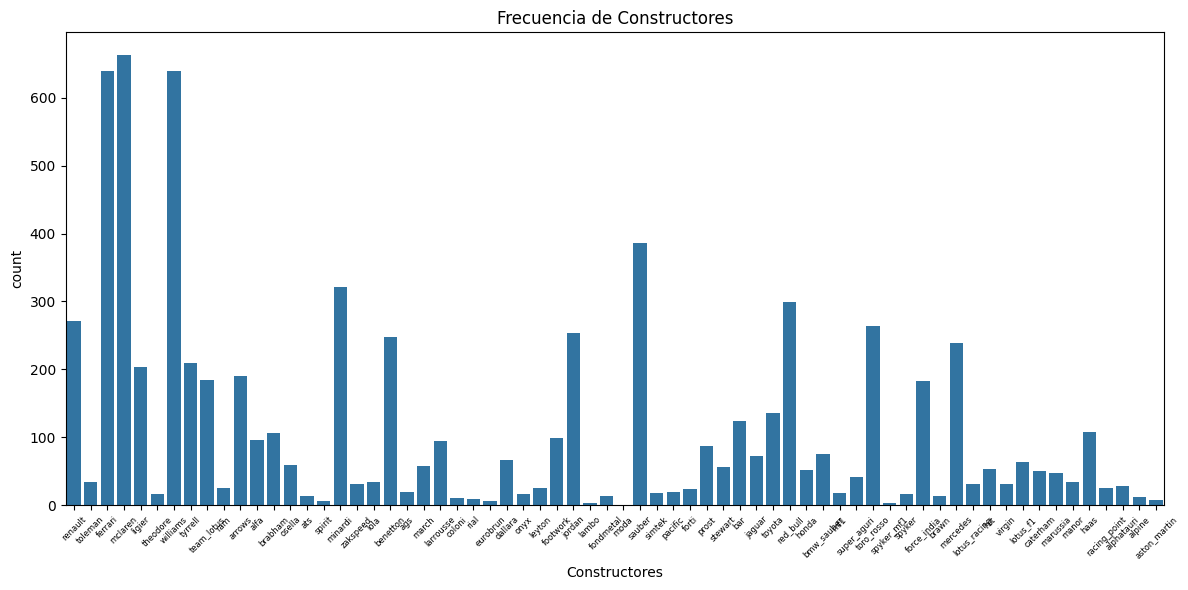

Gráfico de dispersión entre Sesion y Piloto


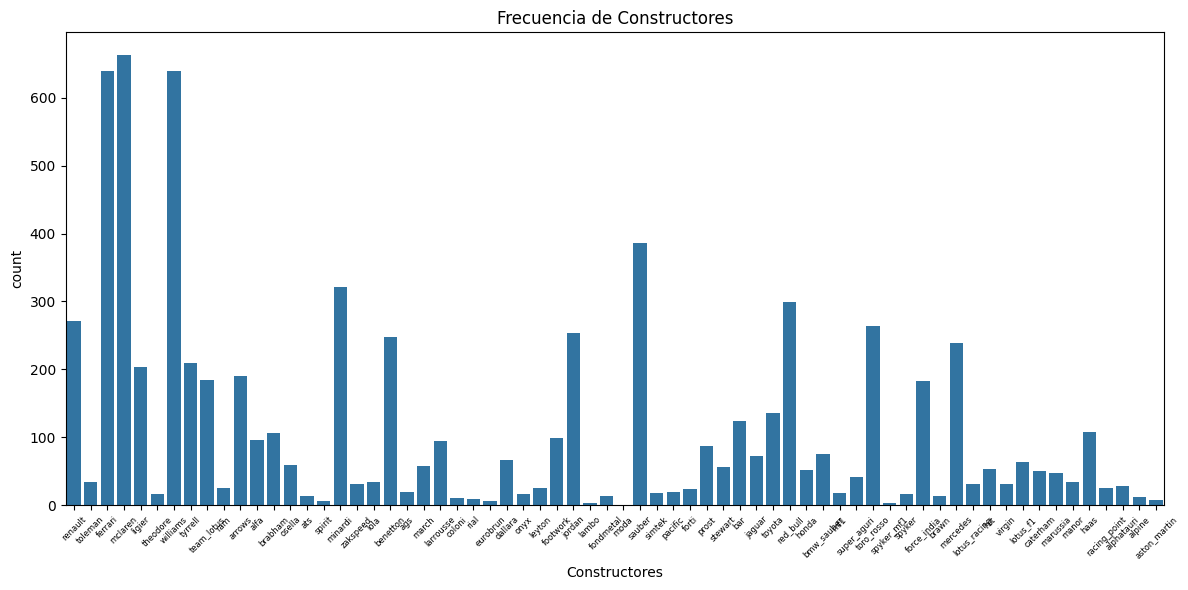

Gráfico de dispersión entre Sesion y Nacionalidad


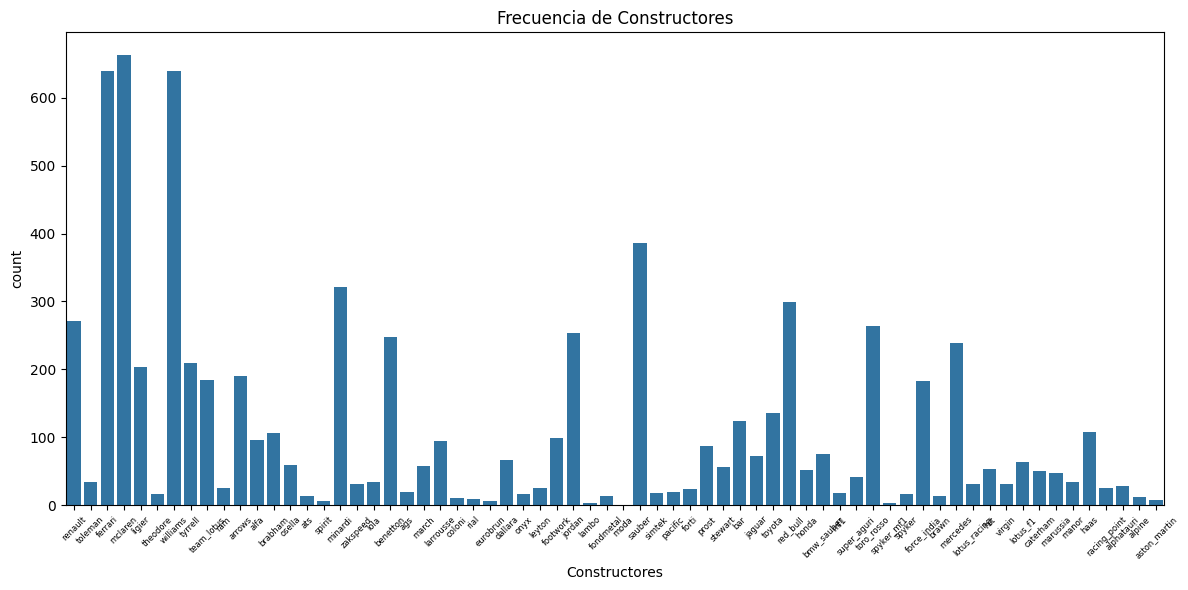

Gráfico de dispersión entre Sesion y Constructores


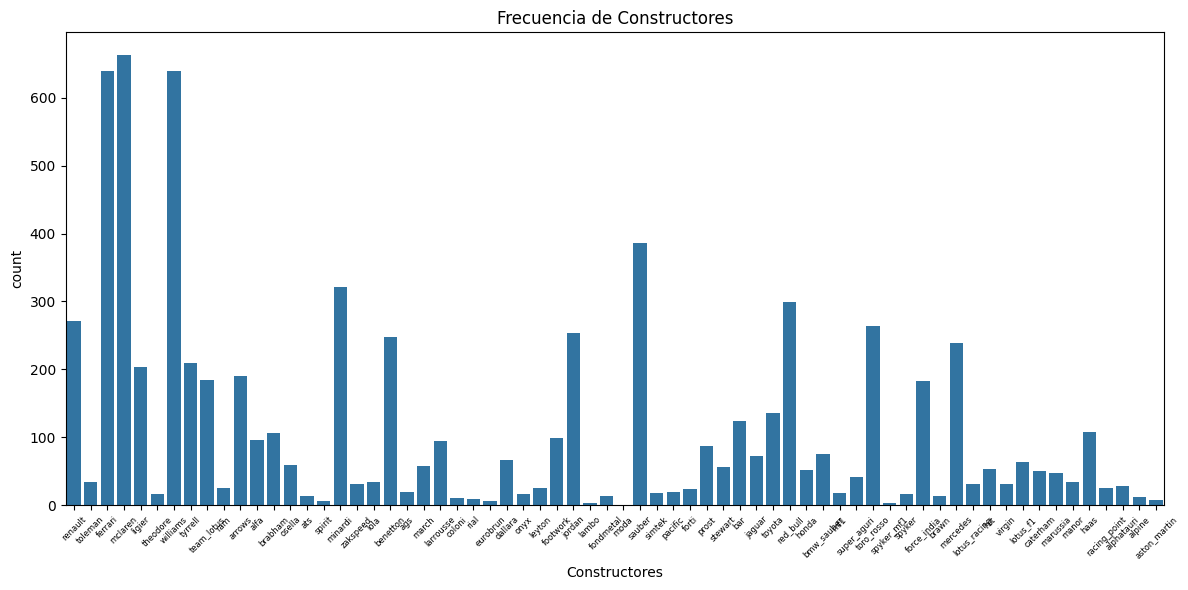

Gráfico de dispersión entre Recorrido y Circuito


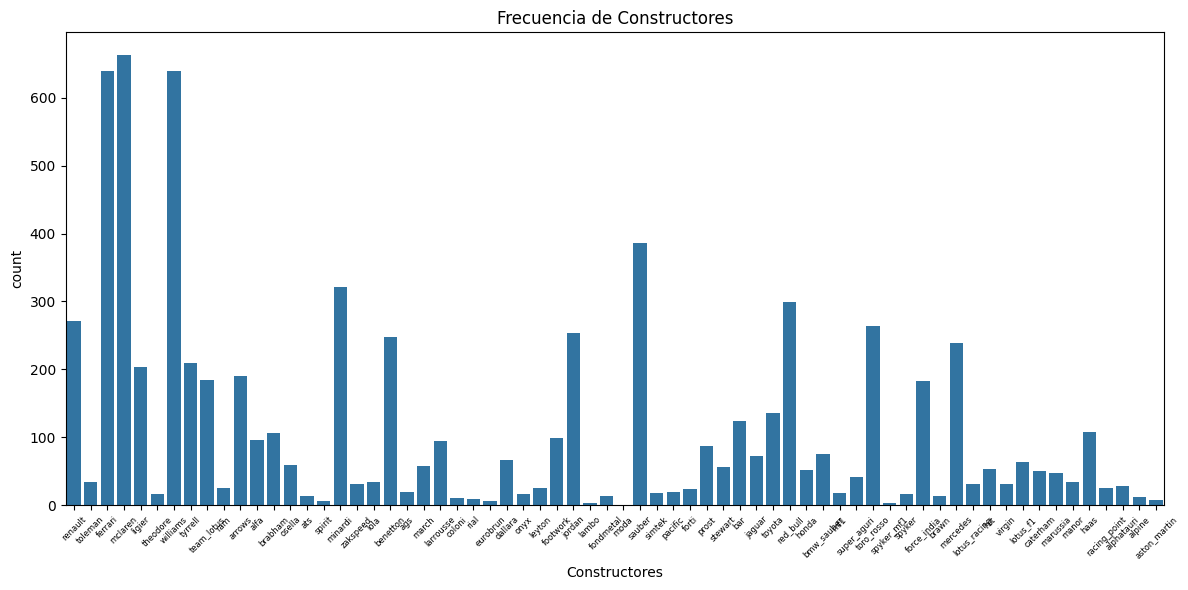

Gráfico de dispersión entre Recorrido y Piloto


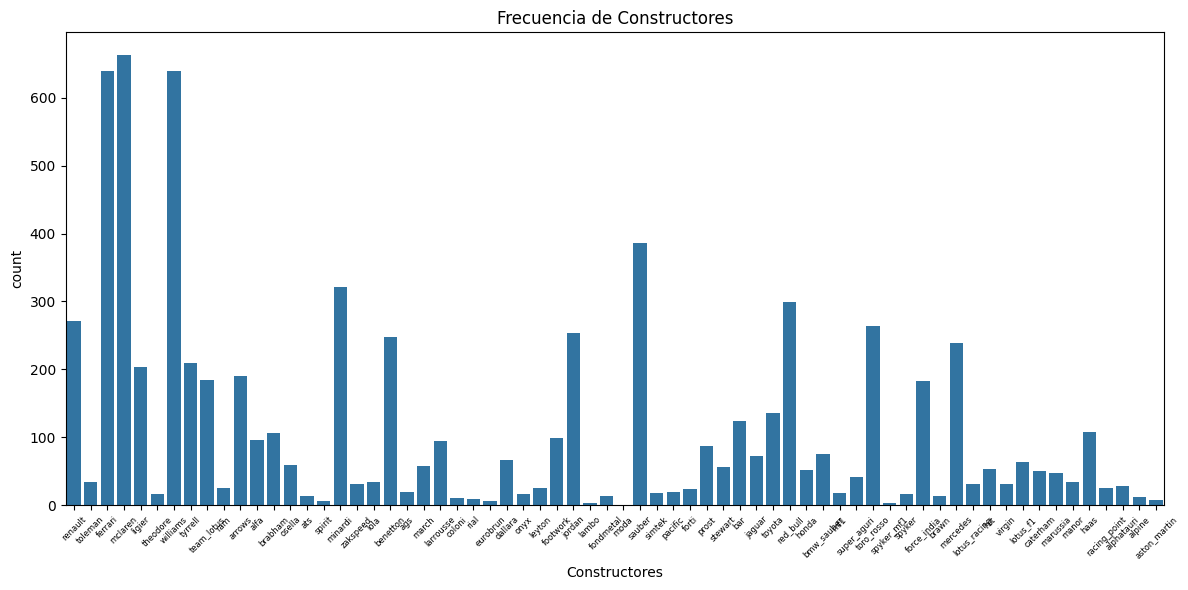

Gráfico de dispersión entre Recorrido y Nacionalidad


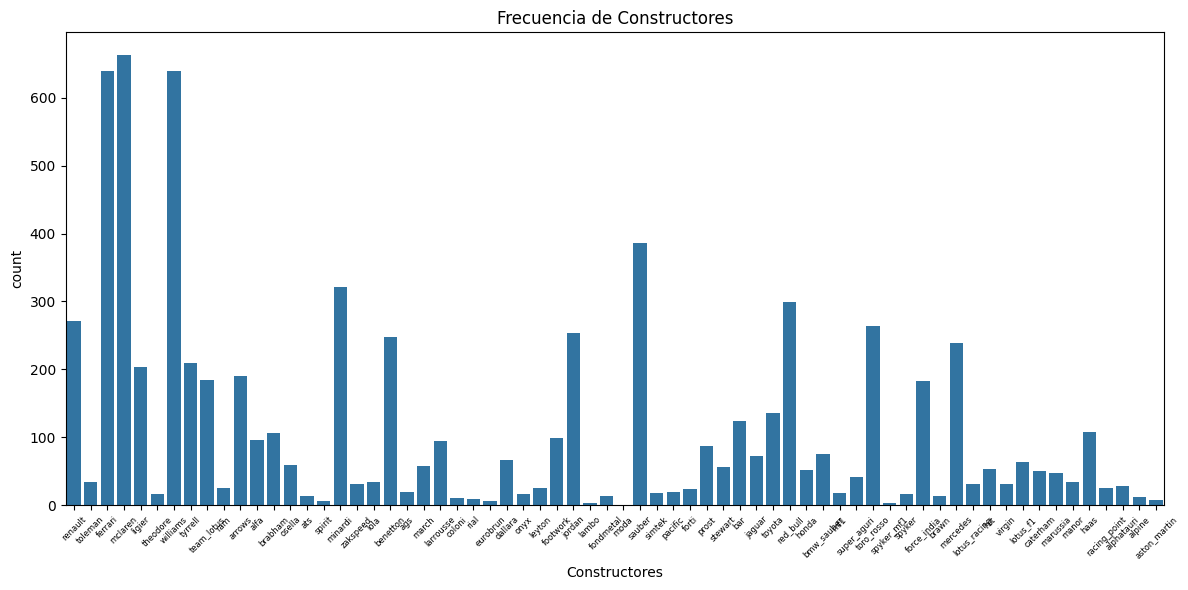

Gráfico de dispersión entre Recorrido y Constructores


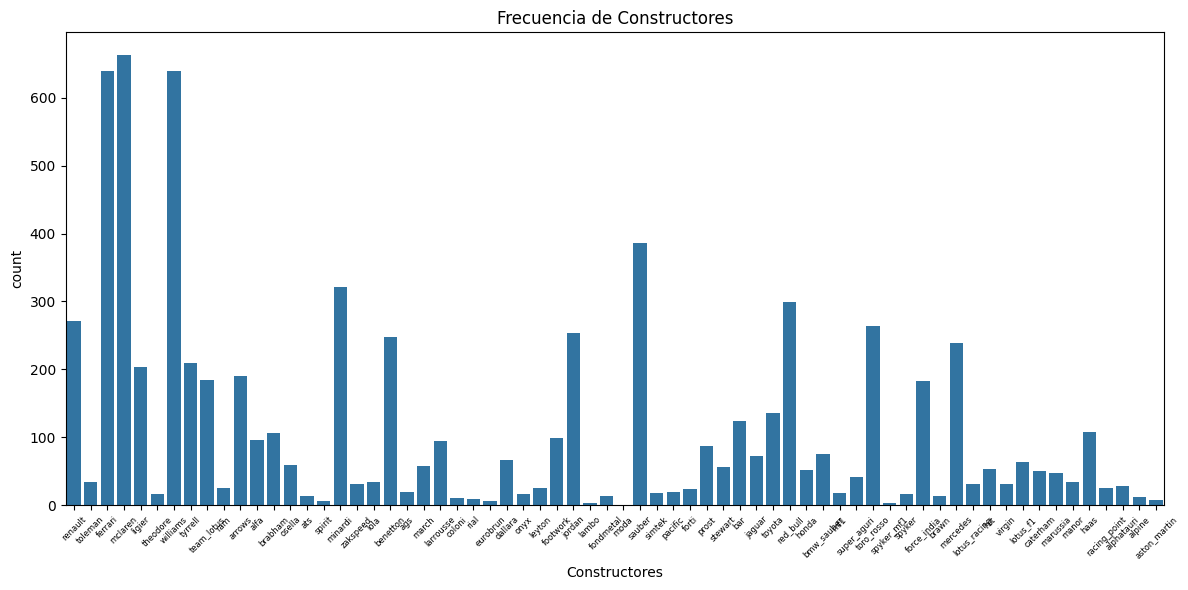

Gráfico de dispersión entre Clima frio y Circuito


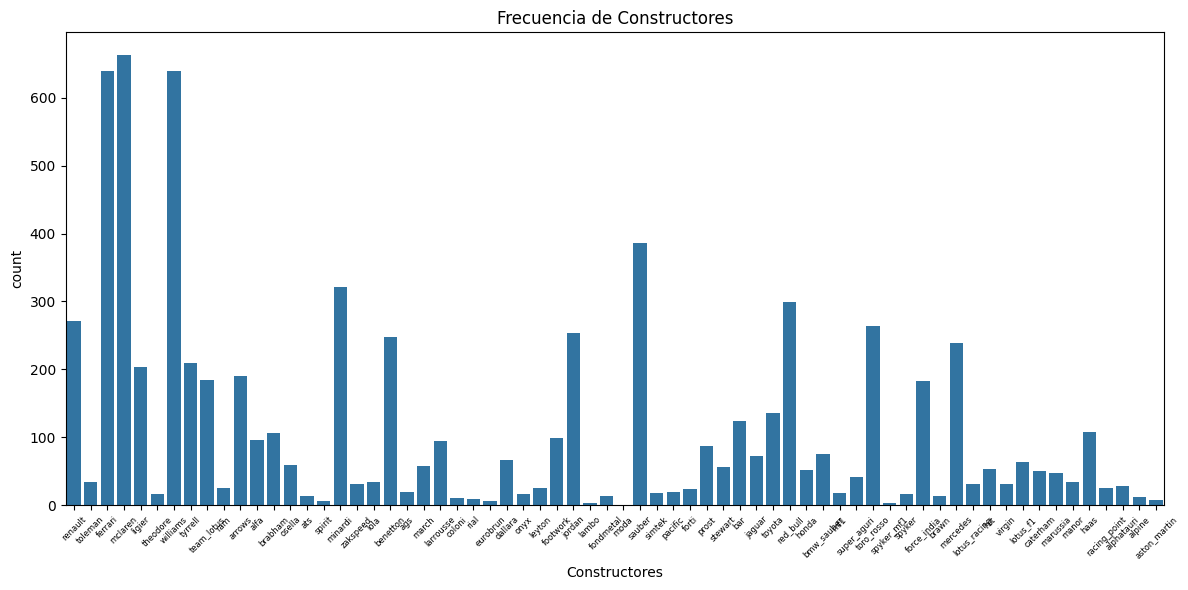

Gráfico de dispersión entre Clima frio y Piloto


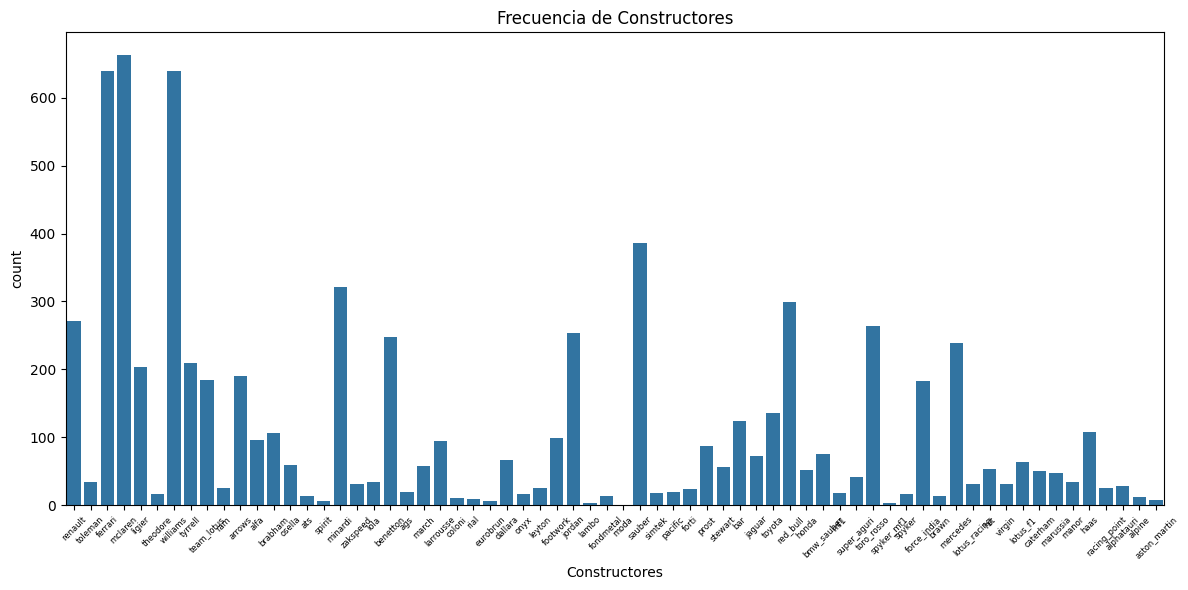

Gráfico de dispersión entre Clima frio y Nacionalidad


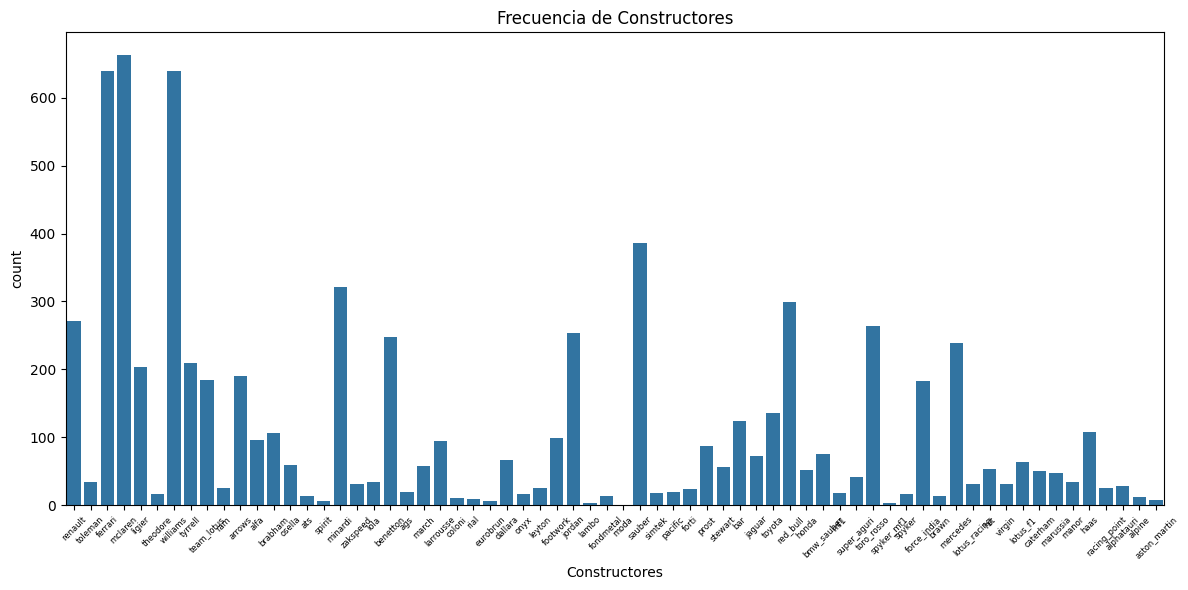

Gráfico de dispersión entre Clima frio y Constructores


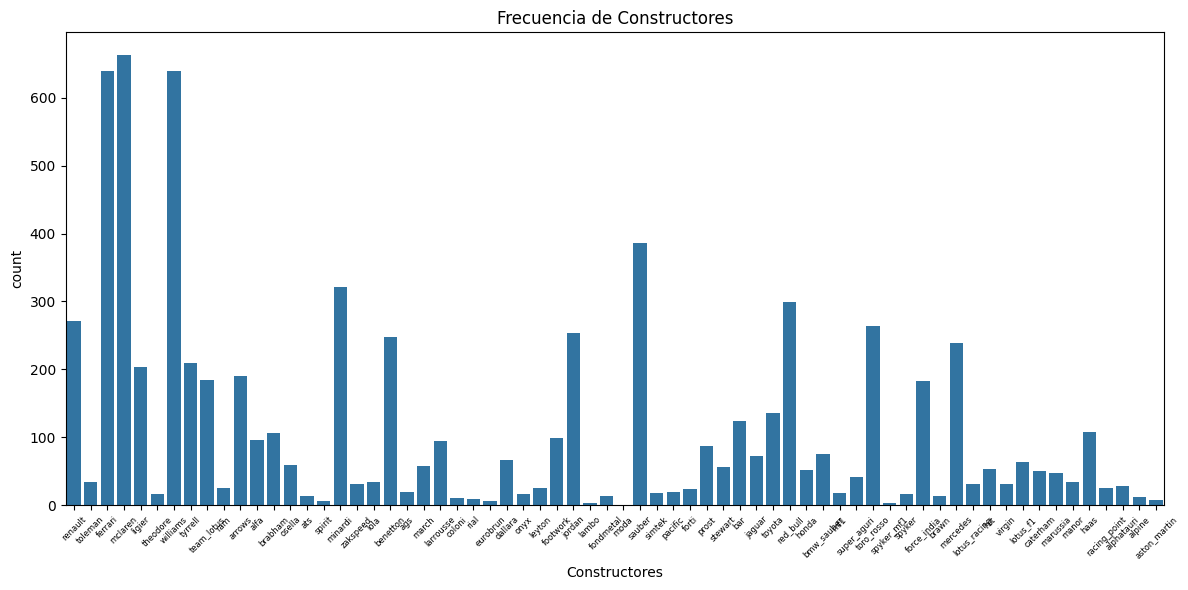

Gráfico de dispersión entre Clima lluvioso y Circuito


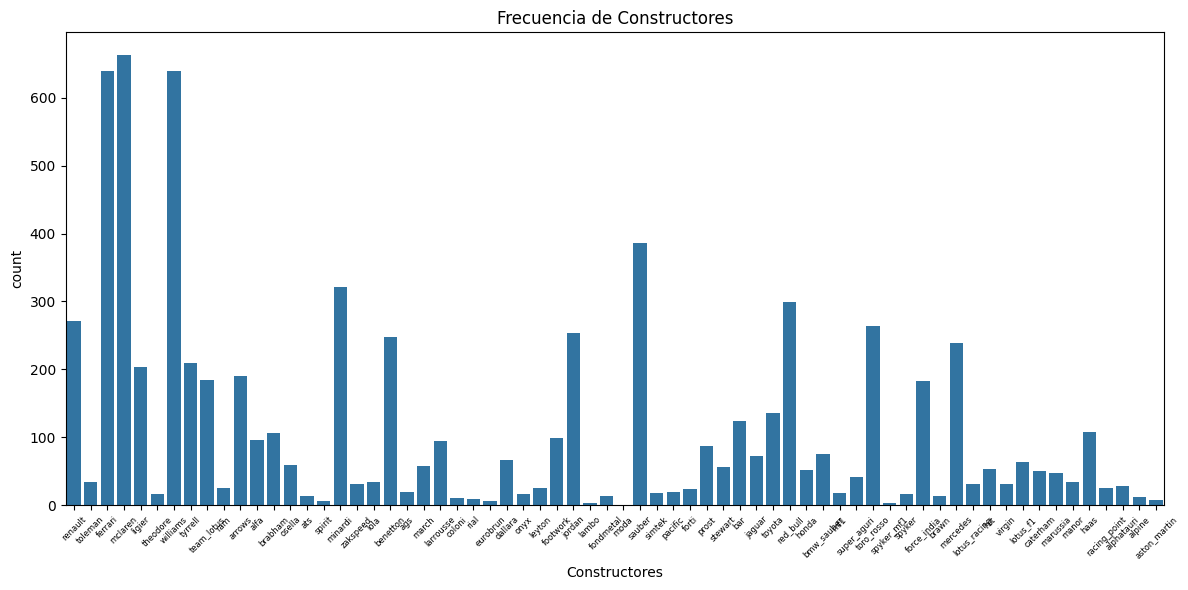

Gráfico de dispersión entre Clima lluvioso y Piloto


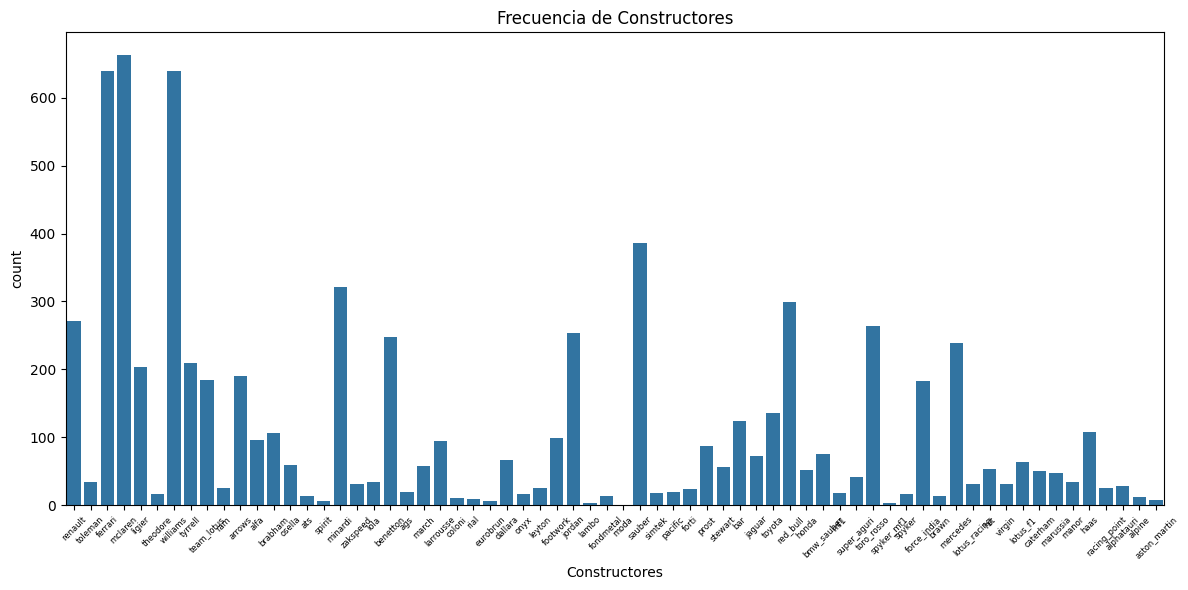

Gráfico de dispersión entre Clima lluvioso y Nacionalidad


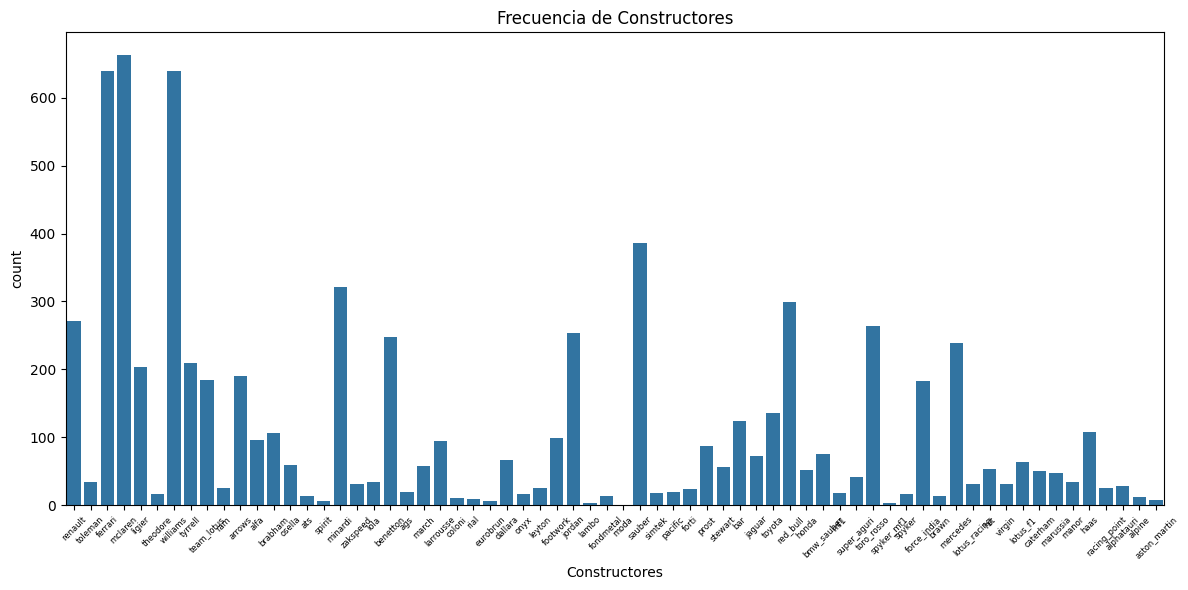

Gráfico de dispersión entre Clima lluvioso y Constructores


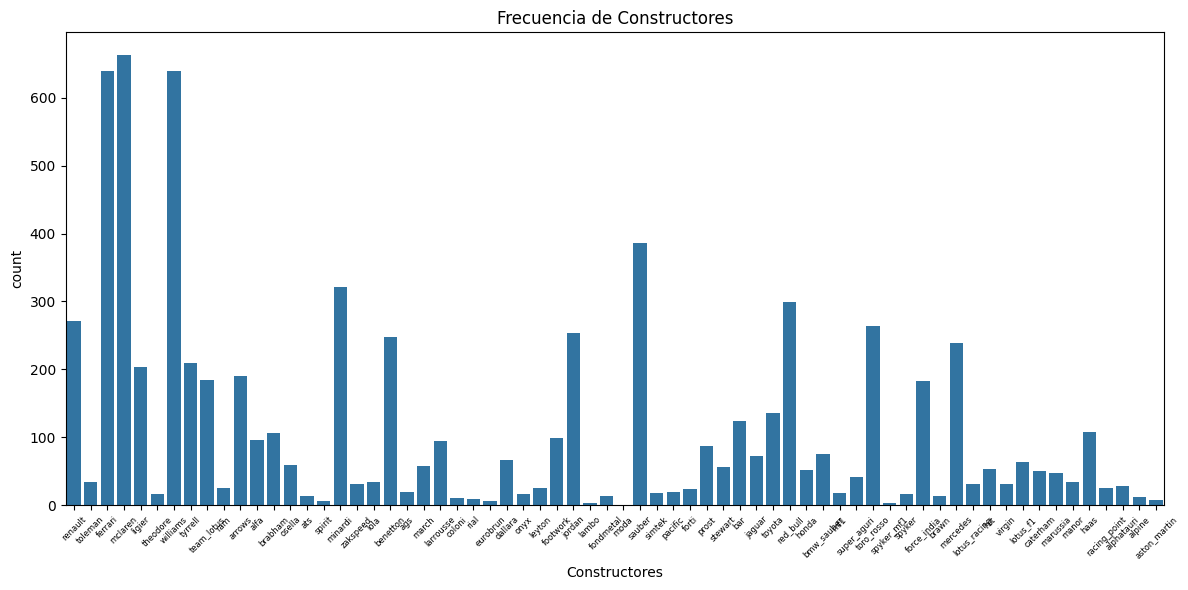

Gráfico de dispersión entre Puntos_piloto y Circuito


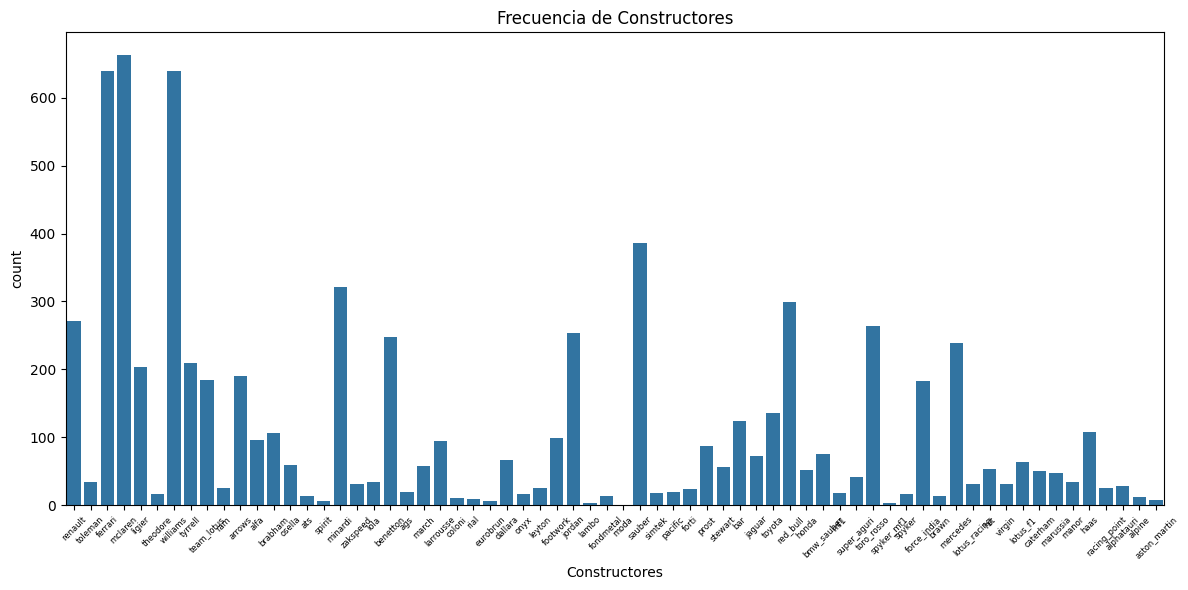

Gráfico de dispersión entre Puntos_piloto y Piloto


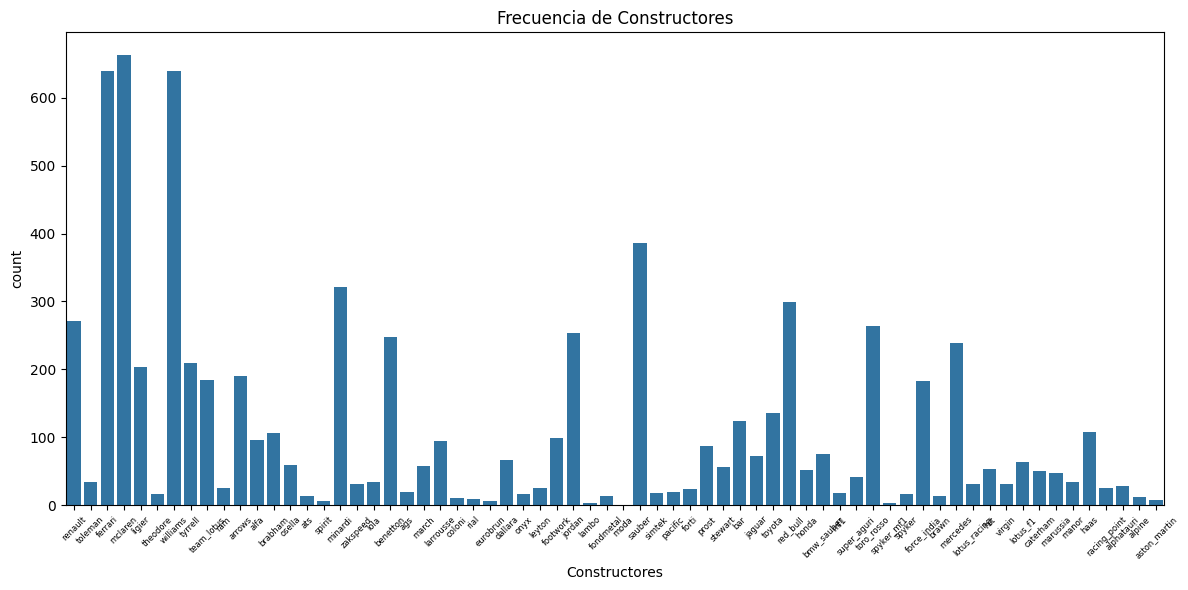

Gráfico de dispersión entre Puntos_piloto y Nacionalidad


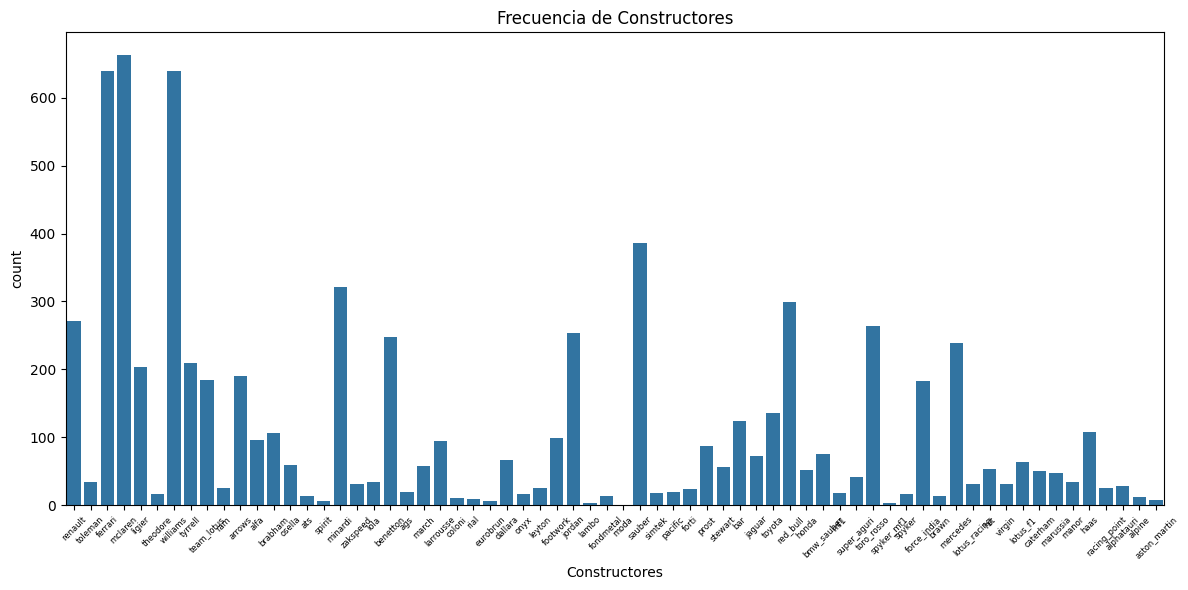

Gráfico de dispersión entre Puntos_piloto y Constructores


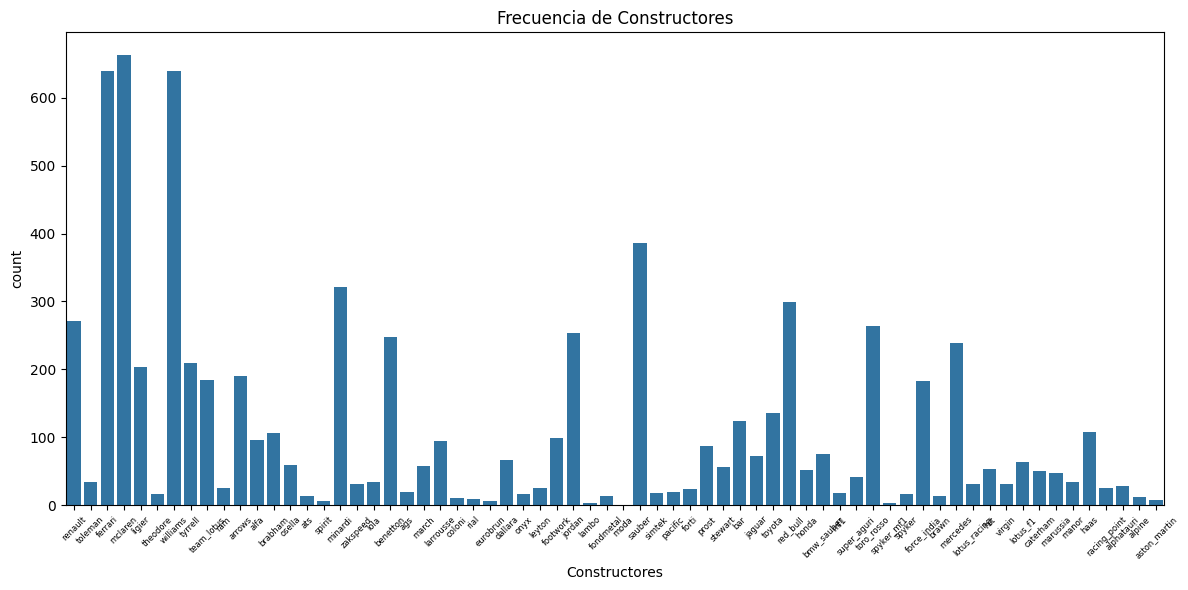

Gráfico de dispersión entre Victorias_piloto y Circuito


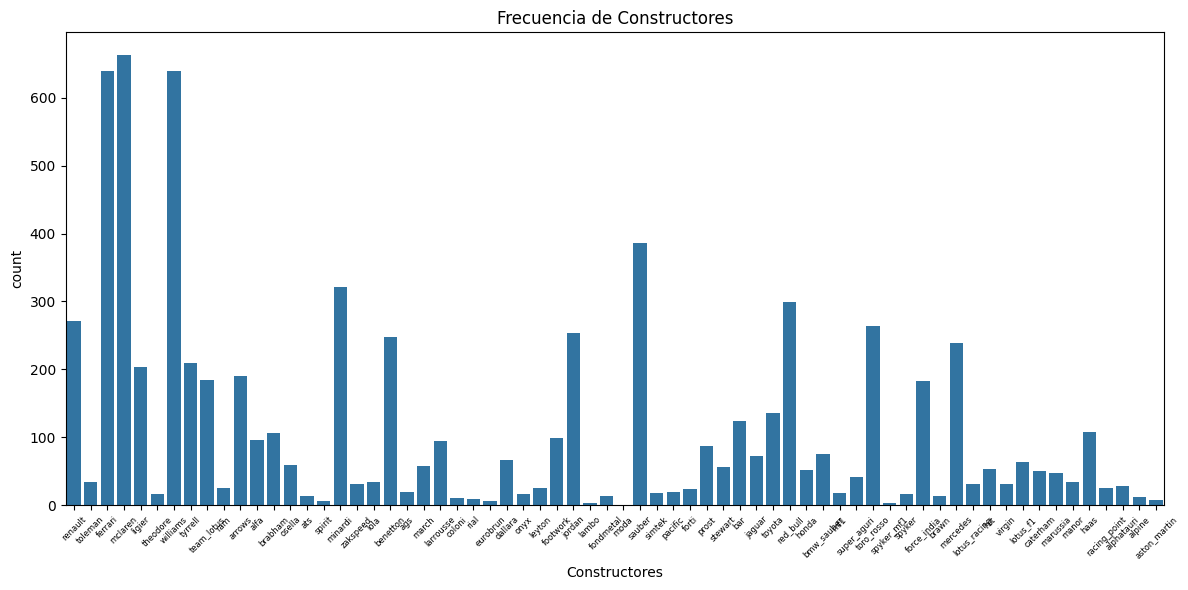

Gráfico de dispersión entre Victorias_piloto y Piloto


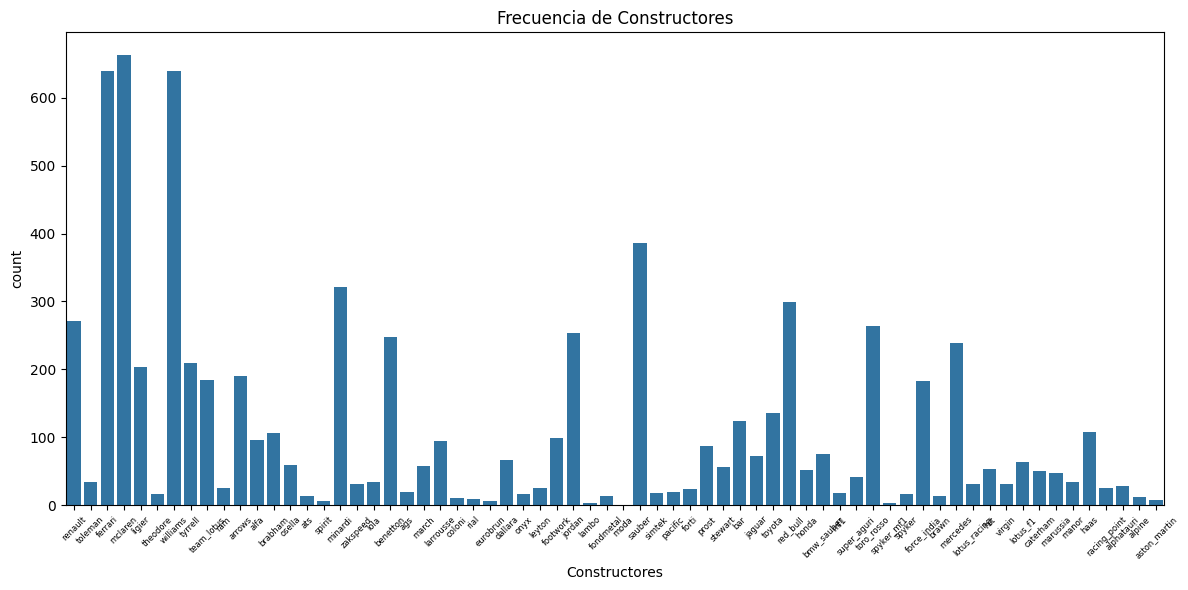

Gráfico de dispersión entre Victorias_piloto y Nacionalidad


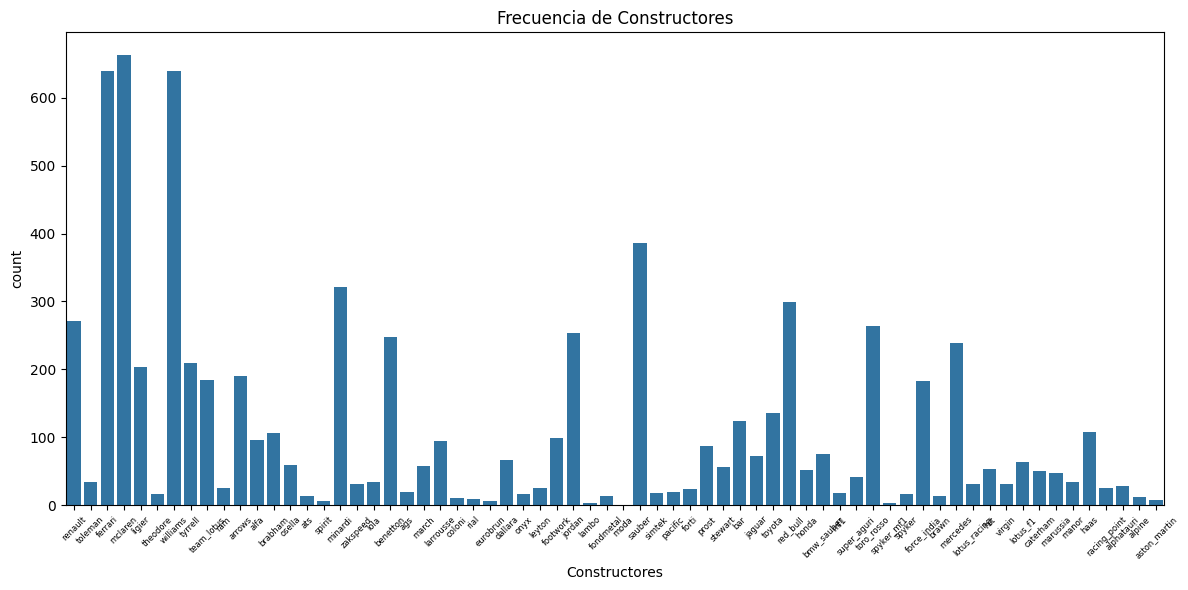

Gráfico de dispersión entre Victorias_piloto y Constructores


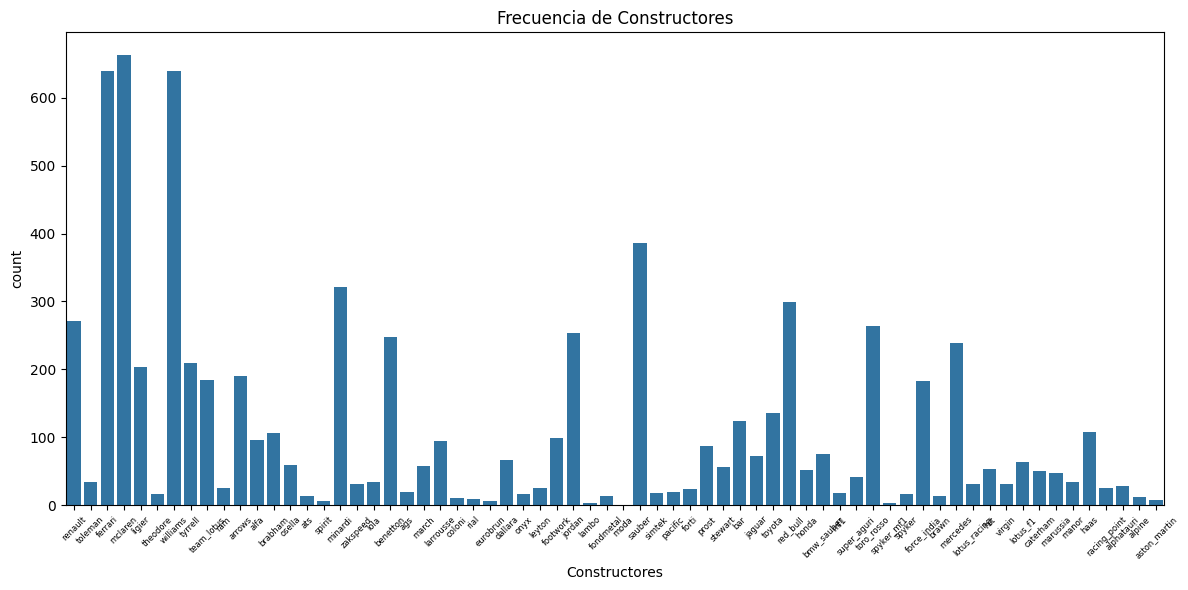

Gráfico de dispersión entre Posicion_piloto y Circuito


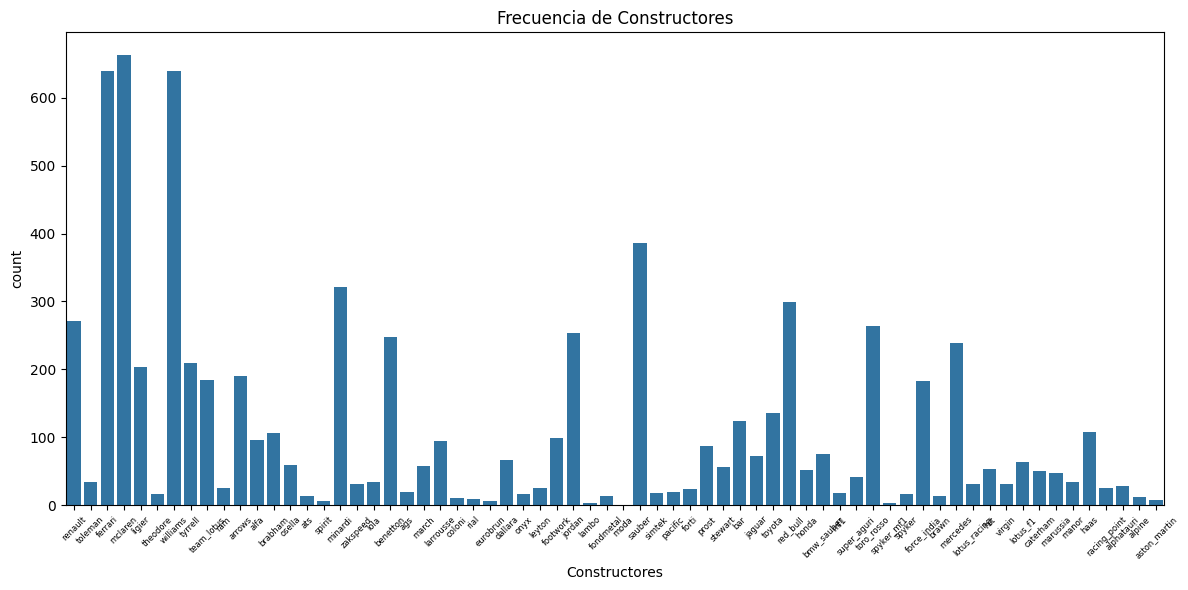

Gráfico de dispersión entre Posicion_piloto y Piloto


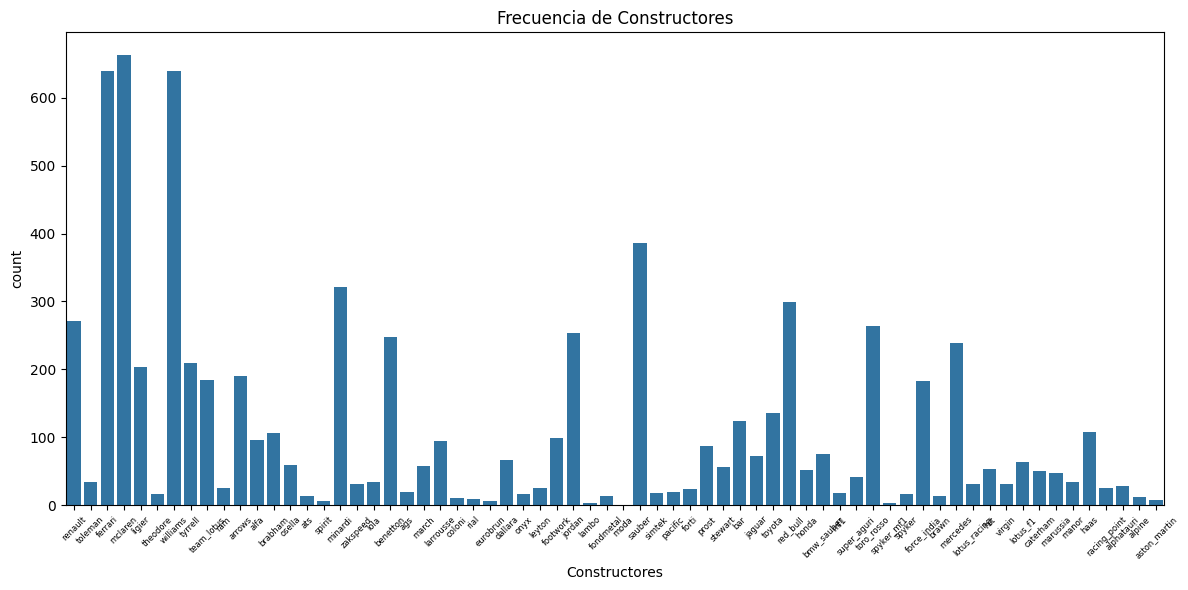

Gráfico de dispersión entre Posicion_piloto y Nacionalidad


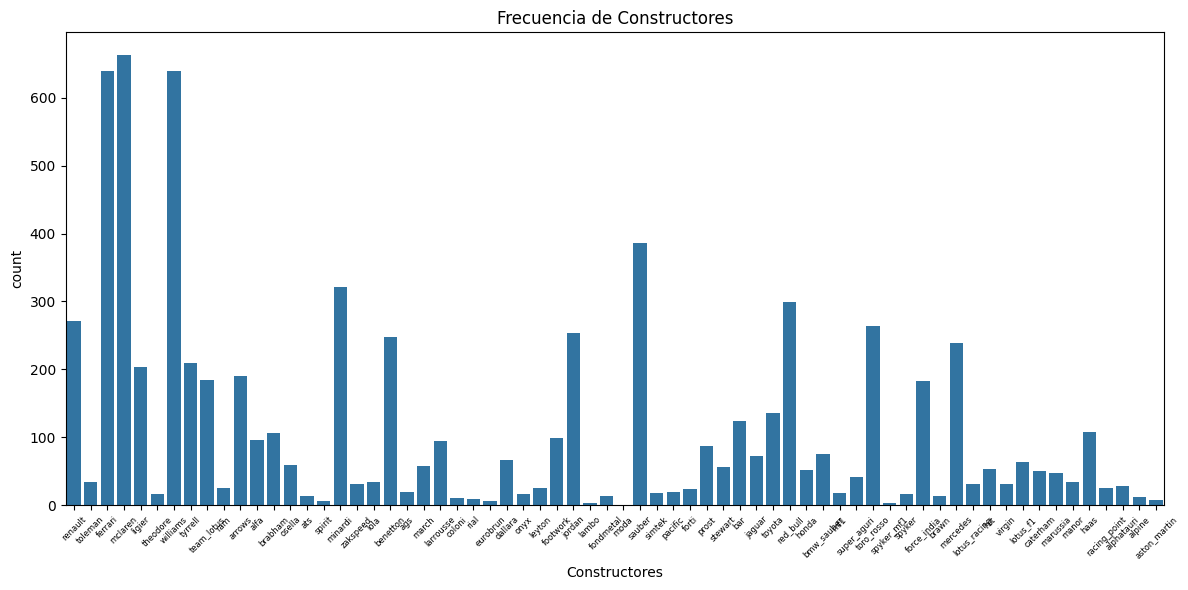

Gráfico de dispersión entre Posicion_piloto y Constructores


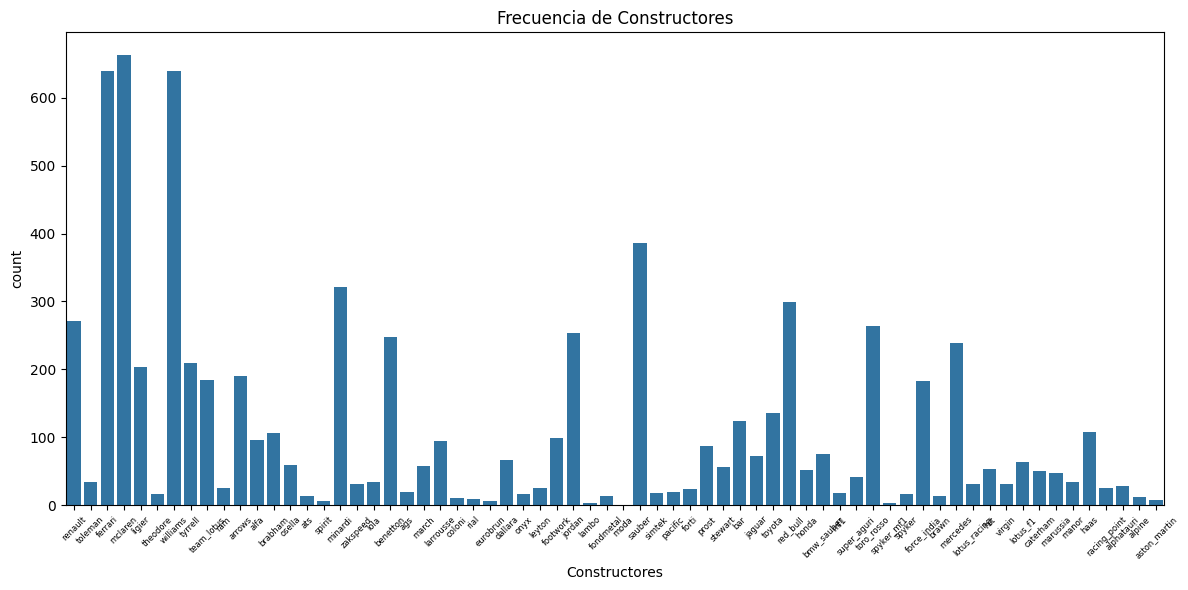

Gráfico de dispersión entre Puntos_constructores y Circuito


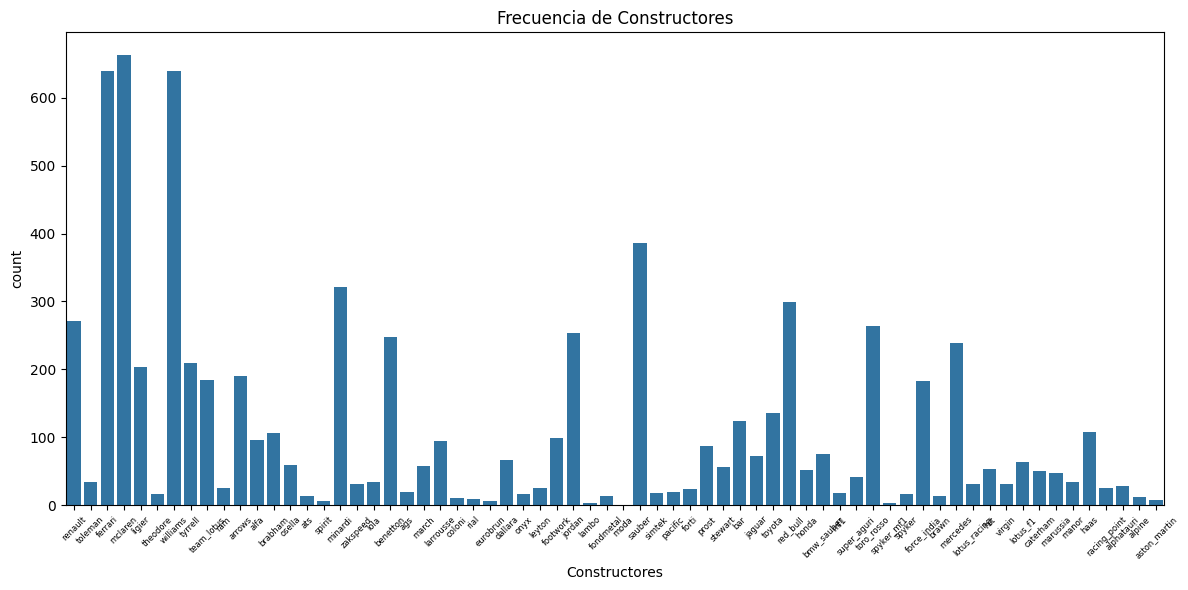

Gráfico de dispersión entre Puntos_constructores y Piloto


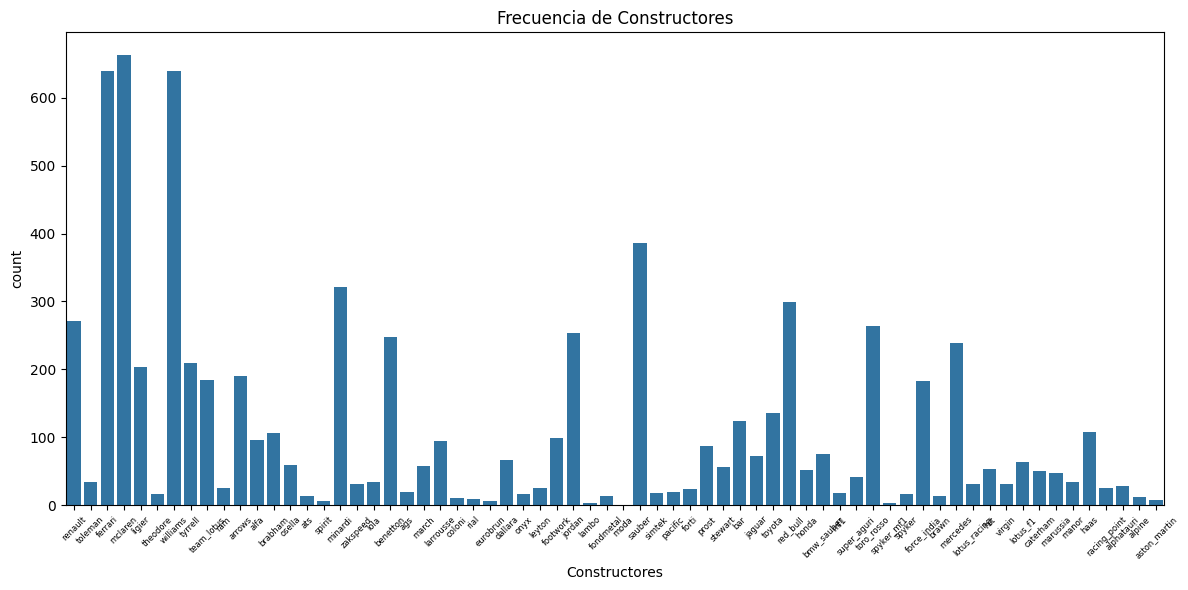

Gráfico de dispersión entre Puntos_constructores y Nacionalidad


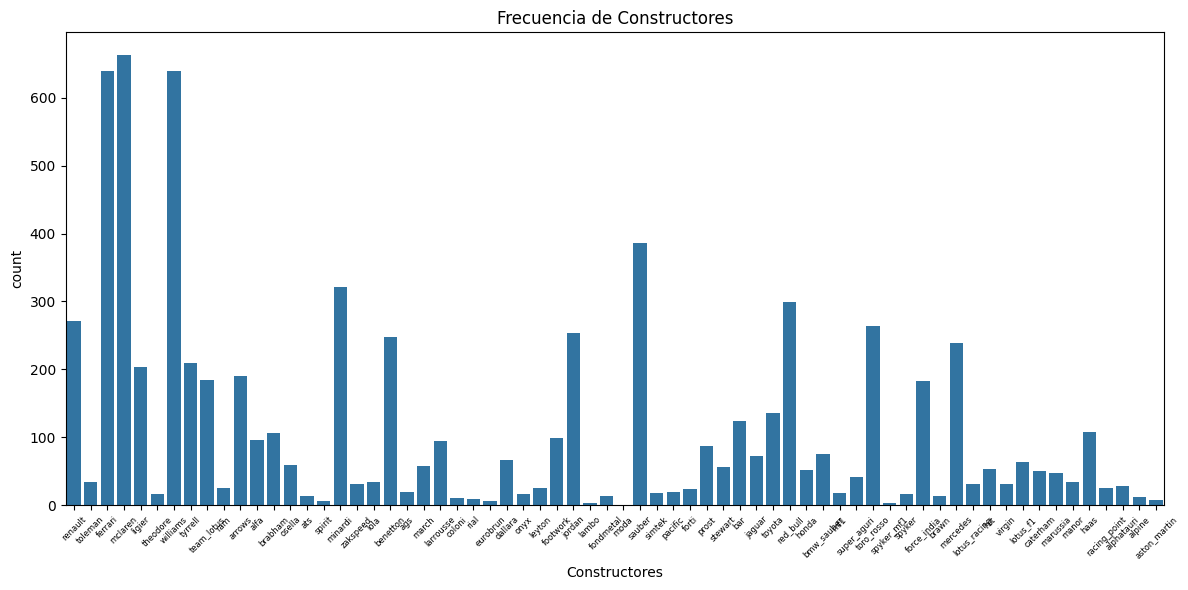

Gráfico de dispersión entre Puntos_constructores y Constructores


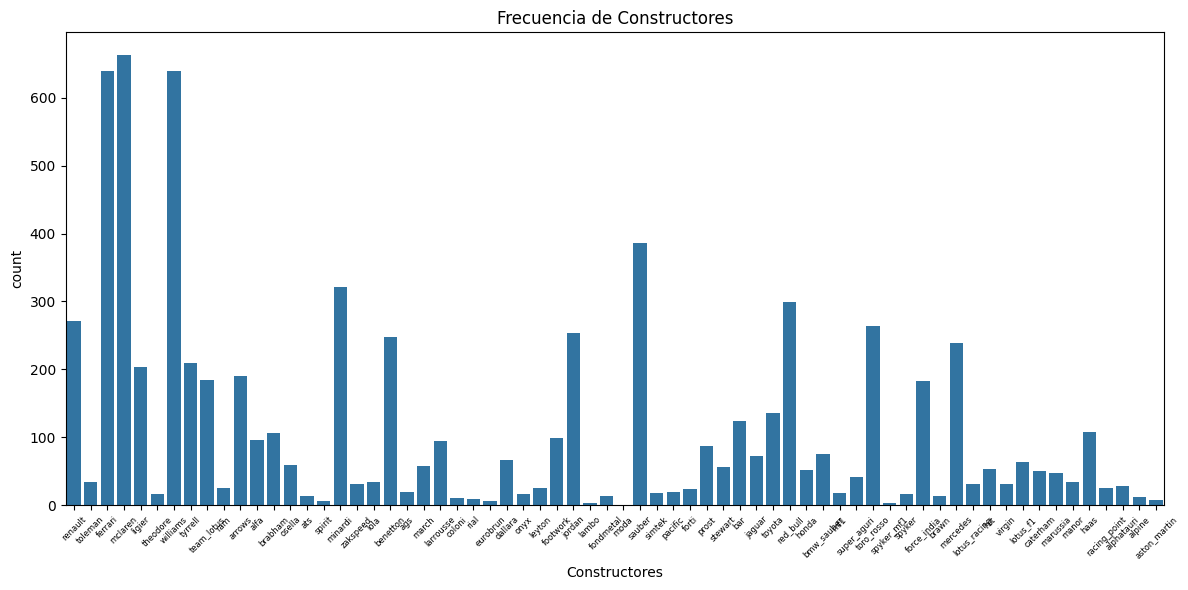

Gráfico de dispersión entre tiempo_clasificación y Circuito


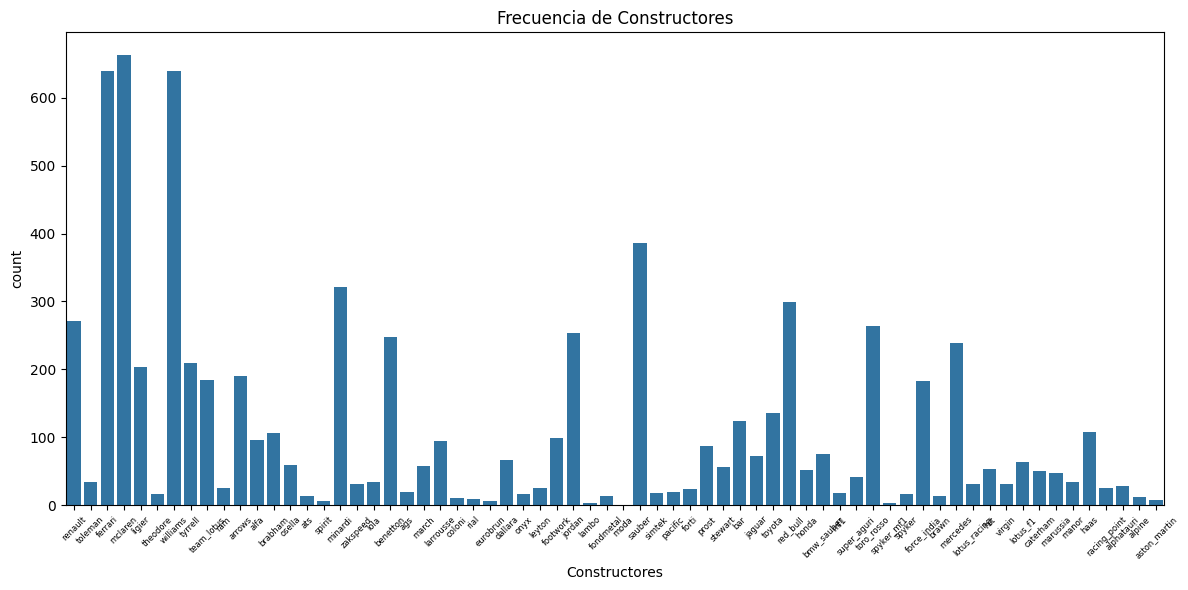

Gráfico de dispersión entre tiempo_clasificación y Piloto


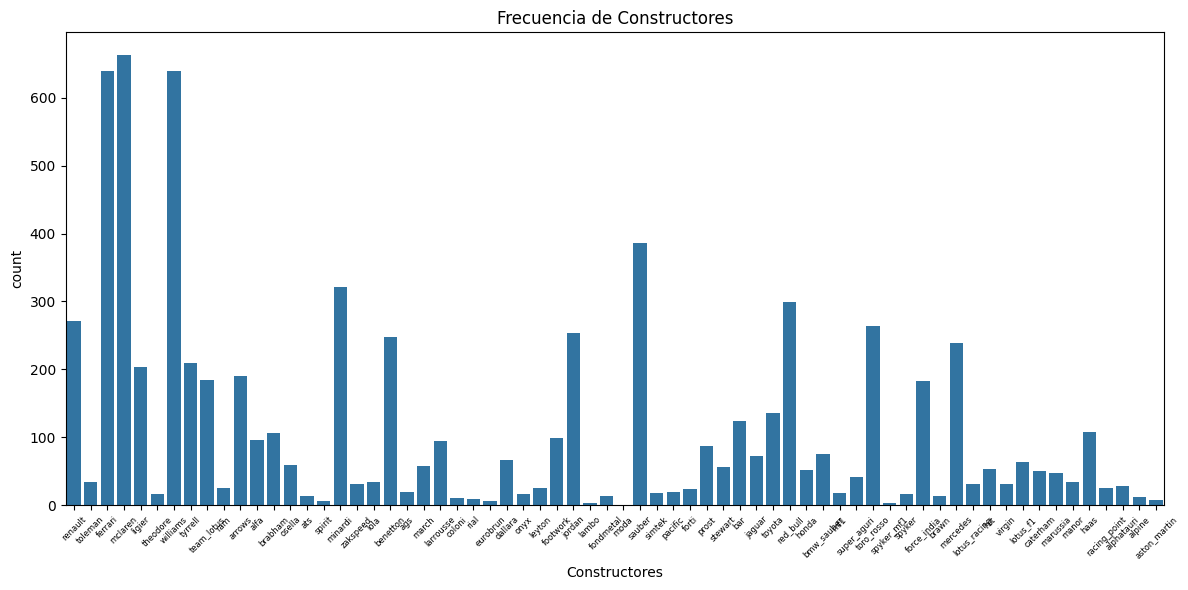

Gráfico de dispersión entre tiempo_clasificación y Nacionalidad


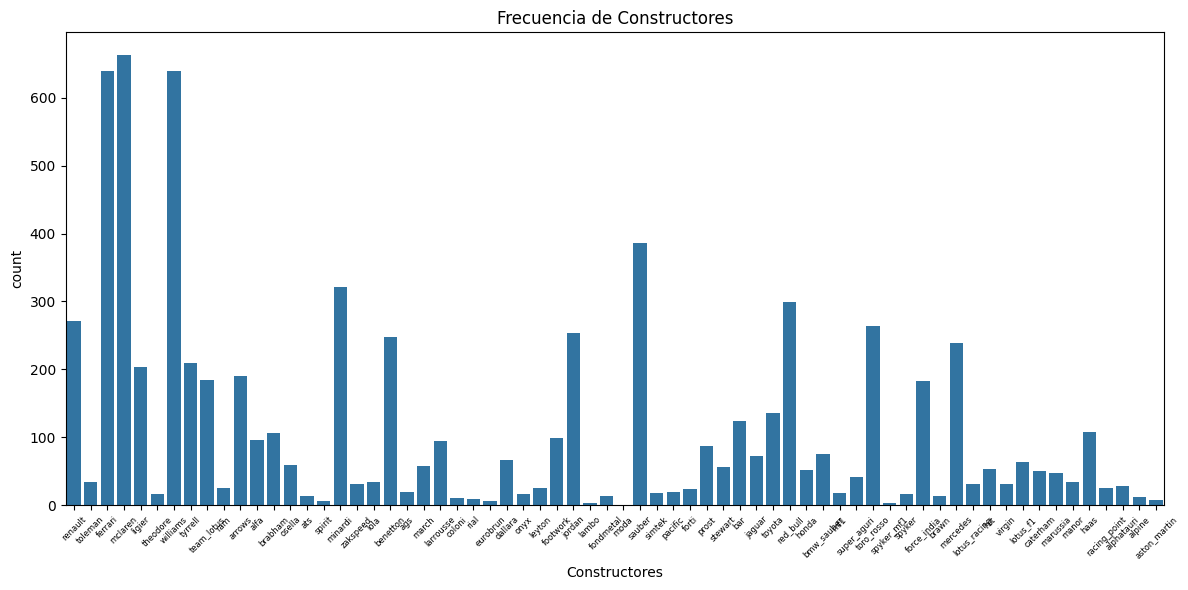

Gráfico de dispersión entre tiempo_clasificación y Constructores


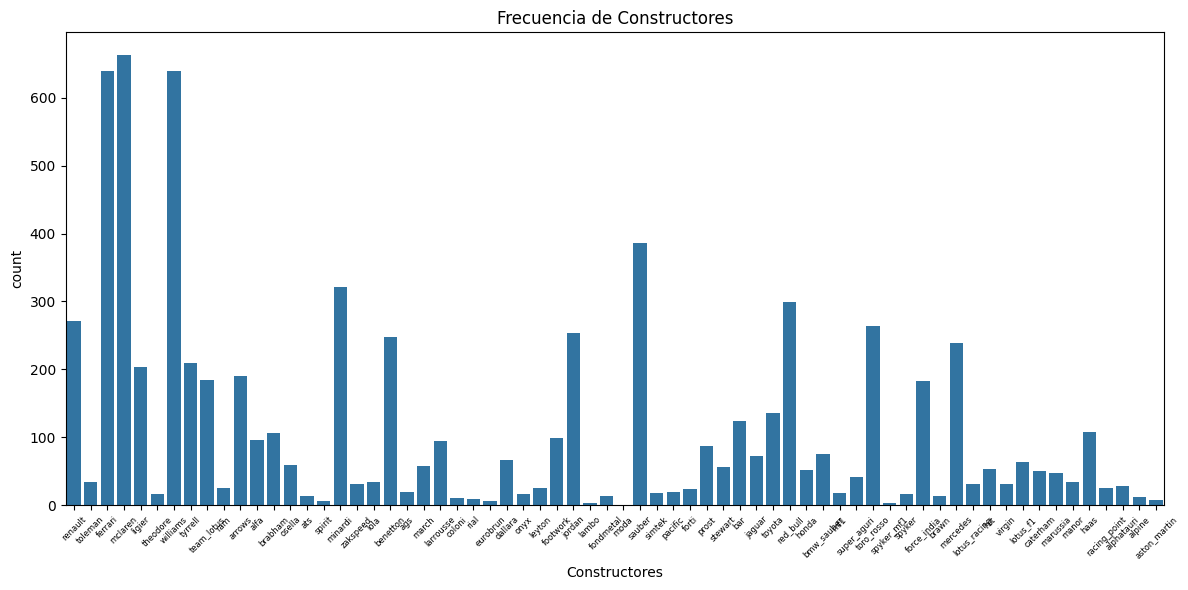

Gráfico de dispersión entre Edad_piloto y Circuito


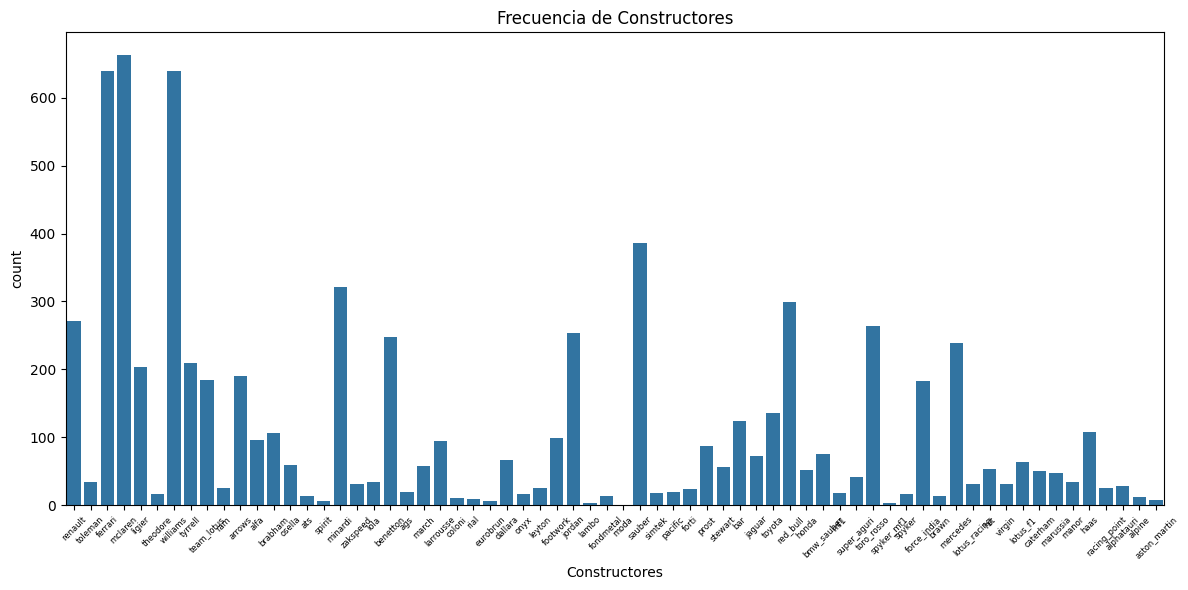

Gráfico de dispersión entre Edad_piloto y Piloto


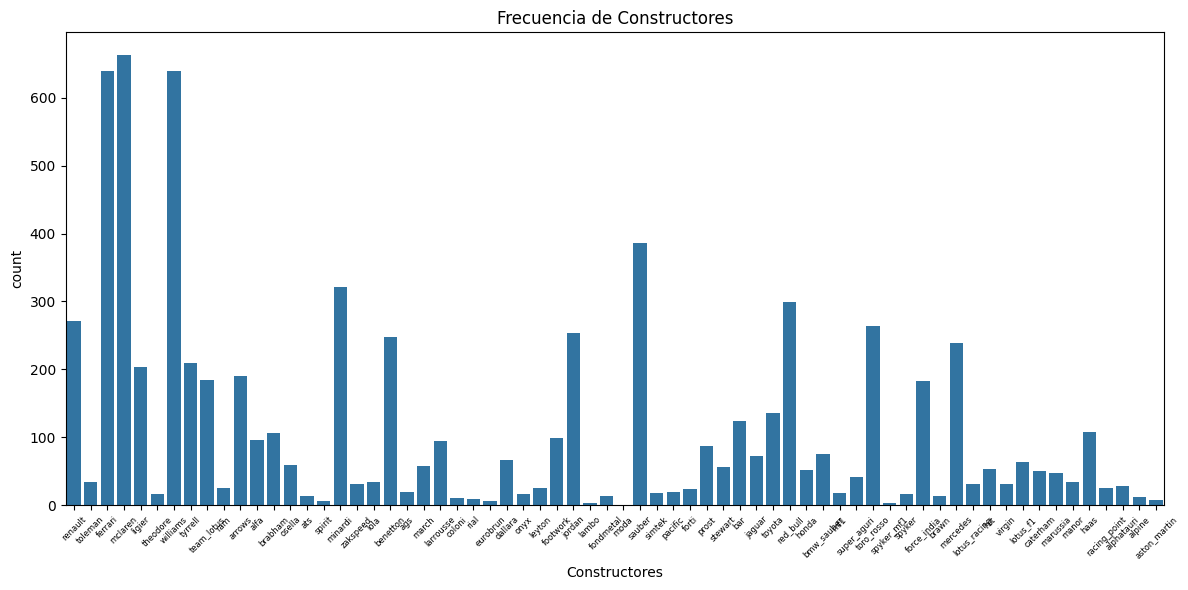

Gráfico de dispersión entre Edad_piloto y Nacionalidad


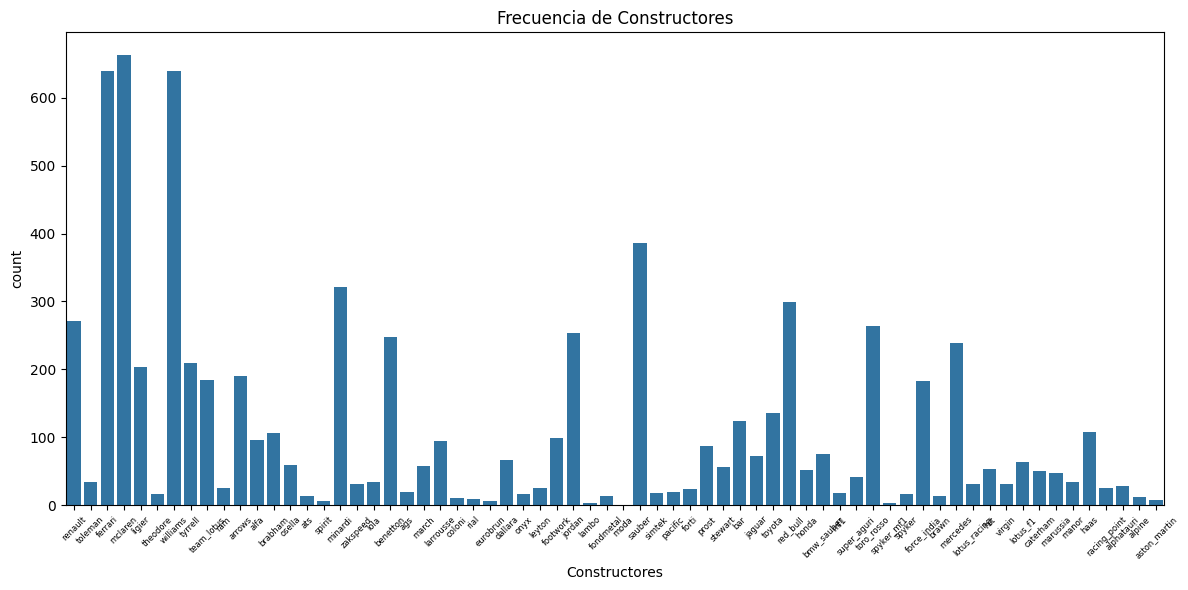

Gráfico de dispersión entre Edad_piloto y Constructores


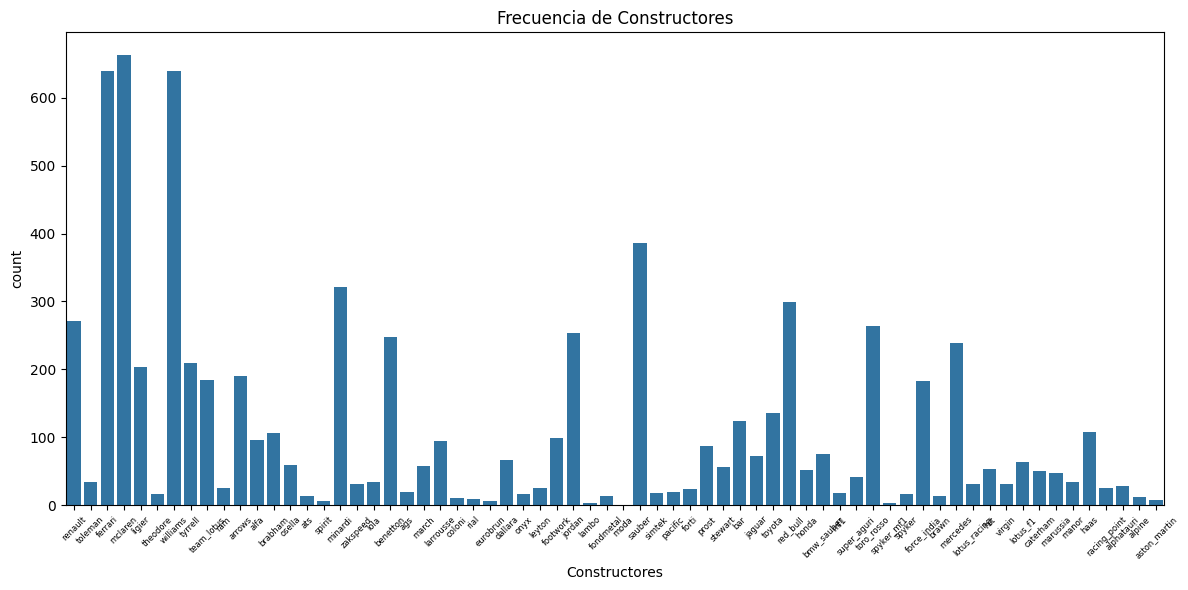

Gráfico de dispersión entre Victorias_constructores y Circuito


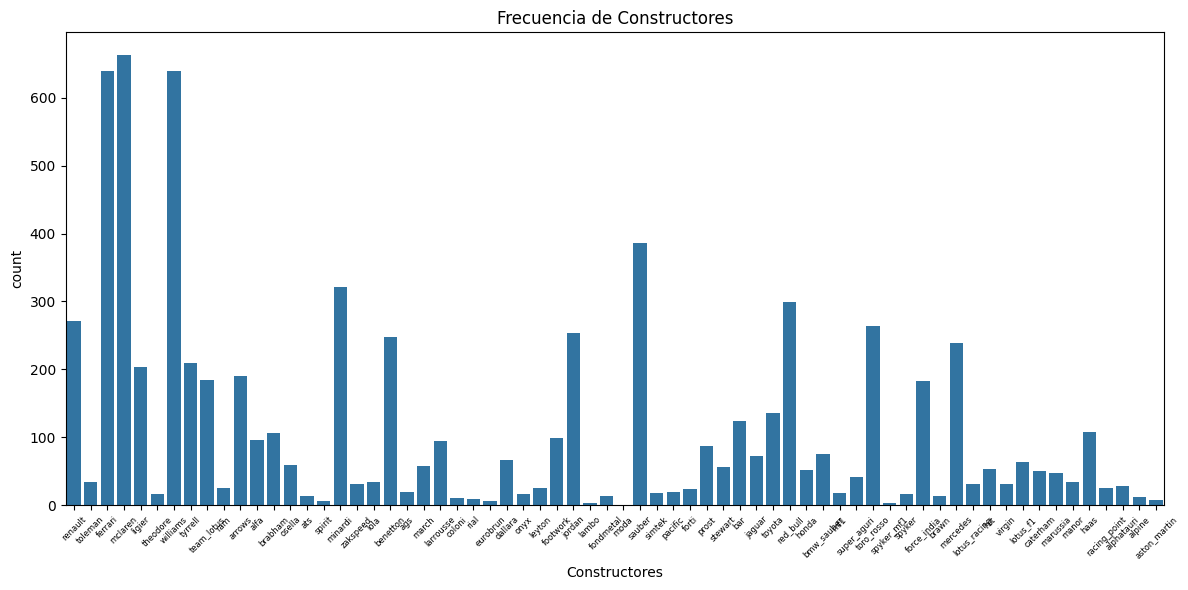

Gráfico de dispersión entre Victorias_constructores y Piloto


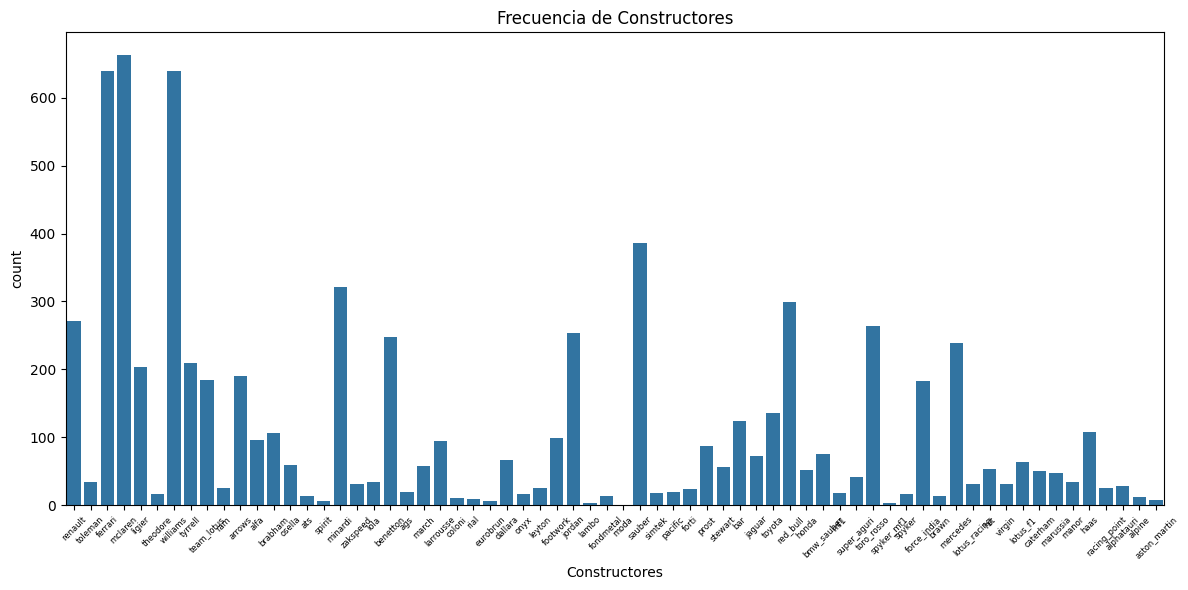

Gráfico de dispersión entre Victorias_constructores y Nacionalidad


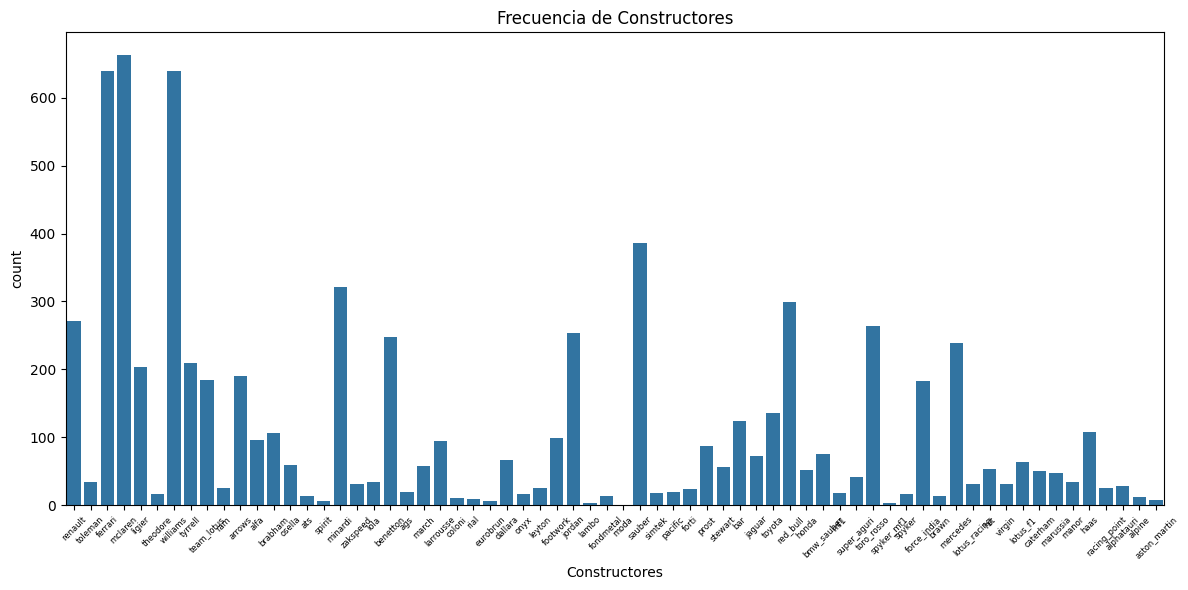

Gráfico de dispersión entre Victorias_constructores y Constructores


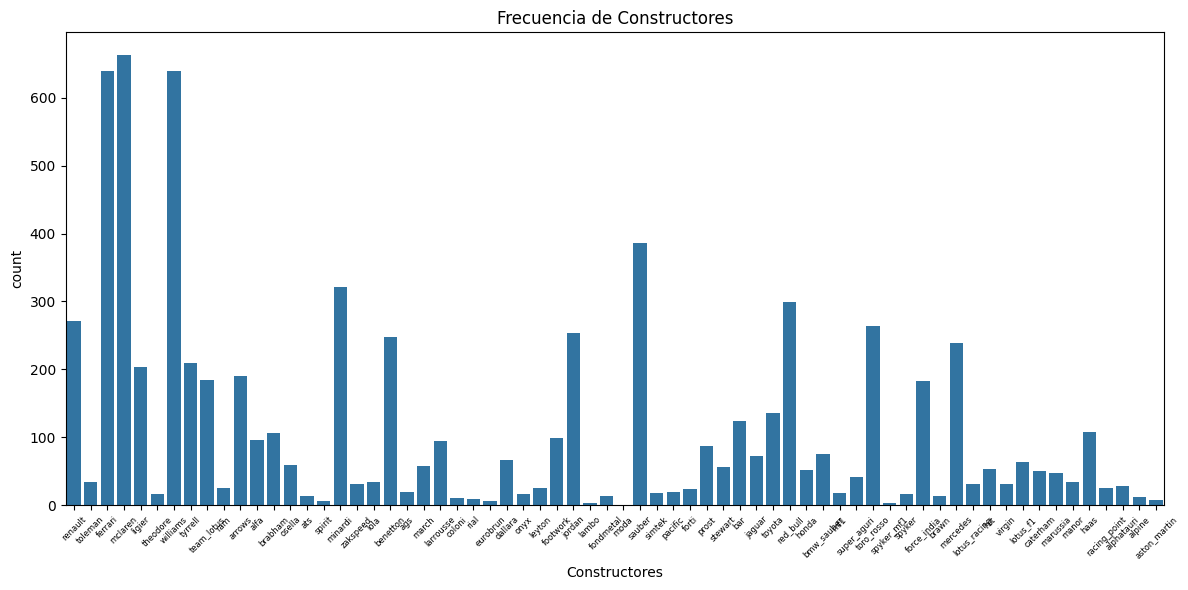

In [77]:
for x in Var_num:
    for y in Var_cat:
        if x != y: 
            if x in df.columns and y in df.columns:

                print(f"Gráfico de dispersión entre {x} y {y}")

                plt.figure(figsize=(12,6))
                sns.countplot(x=df[columna])
                plt.title("Frecuencia de " + columna)
                plt.xticks(rotation=45, fontsize=6)  
                plt.tight_layout()                    
                plt.show()

In [78]:
#Outliers
numeric_cols = df.select_dtypes(include="number").columns.tolist()
results = {}

for columna in numeric_cols:
    Q1 = df[columna].quantile(0.25)
    Q3 = df[columna].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[
        (df[columna] < (Q1 - 1.5 * IQR)) |
        (df[columna] > (Q3 + 1.5 * IQR))
    ]
    
    results[columna] = {
        "Q1": Q1,
        "Q3": Q3,
        "IQR": IQR,
        "Outliers": len(outliers)
 }

results

{'Unnamed: 0': {'Q1': np.float64(3796.25),
  'Q3': np.float64(11259.25),
  'IQR': np.float64(7463.0),
  'Outliers': 0},
 'Sesion': {'Q1': np.float64(1992.0),
  'Q3': np.float64(2012.0),
  'IQR': np.float64(20.0),
  'Outliers': 0},
 'Recorrido': {'Q1': np.float64(5.0),
  'Q3': np.float64(13.0),
  'IQR': np.float64(8.0),
  'Outliers': 0},
 'Clima frio': {'Q1': np.float64(0.0),
  'Q3': np.float64(0.0),
  'IQR': np.float64(0.0),
  'Outliers': 148},
 'Clima lluvioso': {'Q1': np.float64(0.0),
  'Q3': np.float64(0.0),
  'IQR': np.float64(0.0),
  'Outliers': 694},
 'Grilla': {'Q1': np.float64(6.0),
  'Q3': np.float64(17.0),
  'IQR': np.float64(11.0),
  'Outliers': 0},
 'Podio': {'Q1': np.float64(6.0),
  'Q3': np.float64(18.0),
  'IQR': np.float64(12.0),
  'Outliers': 0},
 'Puntos_piloto': {'Q1': np.float64(0.0),
  'Q3': np.float64(20.0),
  'IQR': np.float64(20.0),
  'Outliers': 865},
 'Victorias_piloto': {'Q1': np.float64(0.0),
  'Q3': np.float64(0.0),
  'IQR': np.float64(0.0),
  'Outliers': 1

In [79]:
# Valores faltantes
fal= df.isna().sum()
porcentaje_faltantes = (df.isna().sum() / len(df)) * 100

print("Valores faltantes por columna:")
print(fal)
print("Porcentaje de valores faltantes:")
print(porcentaje_faltantes)

Valores faltantes por columna:
Unnamed: 0                 205
Sesion                       0
Recorrido                    0
Circuito                     0
Clima Calido                 0
Clima frio                   0
Clima seco                   0
Clima lluvioso               0
Clima nublado                0
Piloto                     208
Nacionalidad                 0
Constructores              216
Grilla                       0
Podio                        0
Puntos_piloto                0
Victorias_piloto             0
Posicion_piloto              0
Puntos_constructores         0
Victorias_constructores      0
Constructores_posicion       0
tiempo_clasificación         0
Edad_piloto                  0
dtype: int64
Porcentaje de valores faltantes:
Unnamed: 0                 2.727152
Sesion                     0.000000
Recorrido                  0.000000
Circuito                   0.000000
Clima Calido               0.000000
Clima frio                 0.000000
Clima seco               

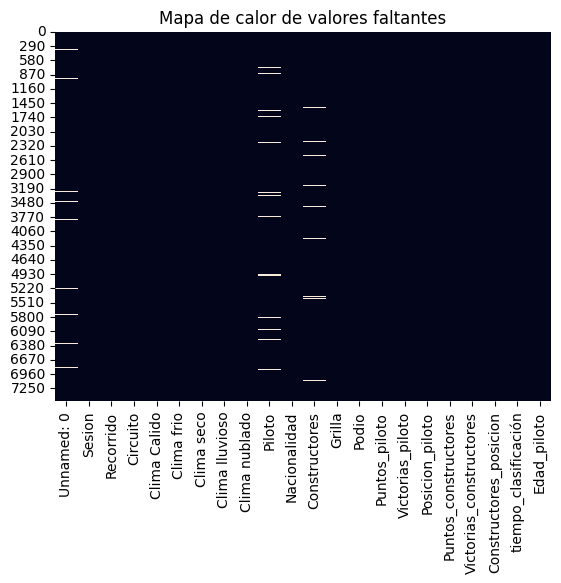

In [80]:
sns.heatmap(df.isnull(), cbar=False)
plt.title("Mapa de calor de valores faltantes")
plt.show()

In [81]:
Var_num = df.select_dtypes(include=['int64', 'float64']).columns

for col in Var_num:
    if df[col].isna().sum() > 0:
        mediana = df[col].median()
        df[col].fillna(mediana, inplace=True)
        print(f"Se imputó la variable {col} con la mediana: {mediana}")

Se imputó la variable Unnamed: 0 con la mediana: 7423.5


In [82]:
Var_cat = df.select_dtypes(include=['object', 'bool']).columns

for col in Var_cat:
    if df[col].isna().sum() > 0:
        moda = df[col].mode()[0]
        df[col].fillna(moda, inplace=True)
        print(f"Se imputó la variable {col} con la moda: {moda}")

Se imputó la variable Piloto con la moda: raikkonen
Se imputó la variable Constructores con la moda: mclaren


In [83]:
columnas_eliminar = porcentaje_faltantes[porcentaje_faltantes > 50].index
df.drop(columns=columnas_eliminar, inplace=True)
print("Columnas eliminadas por exceso de valores faltantes:", columnas_eliminar.tolist())

Columnas eliminadas por exceso de valores faltantes: []


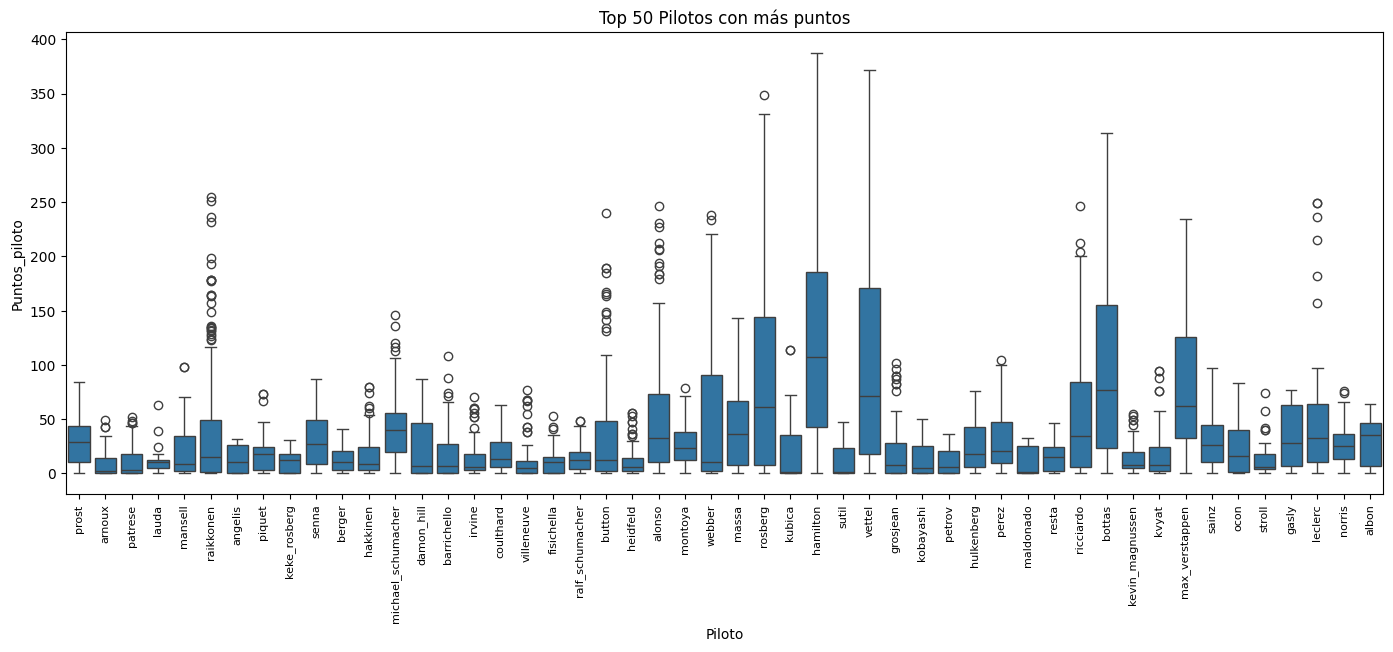

In [84]:
top_pilotos = df.groupby("Piloto")["Puntos_piloto"].mean().nlargest(50).index
df_top = df[df["Piloto"].isin(top_pilotos)]
plt.figure(figsize=(17,6))
sns.boxplot(x="Piloto", y="Puntos_piloto", data=df_top)
plt.xticks(rotation=90, fontsize=8)
plt.title("Top 50 Pilotos con más puntos")
plt.show()

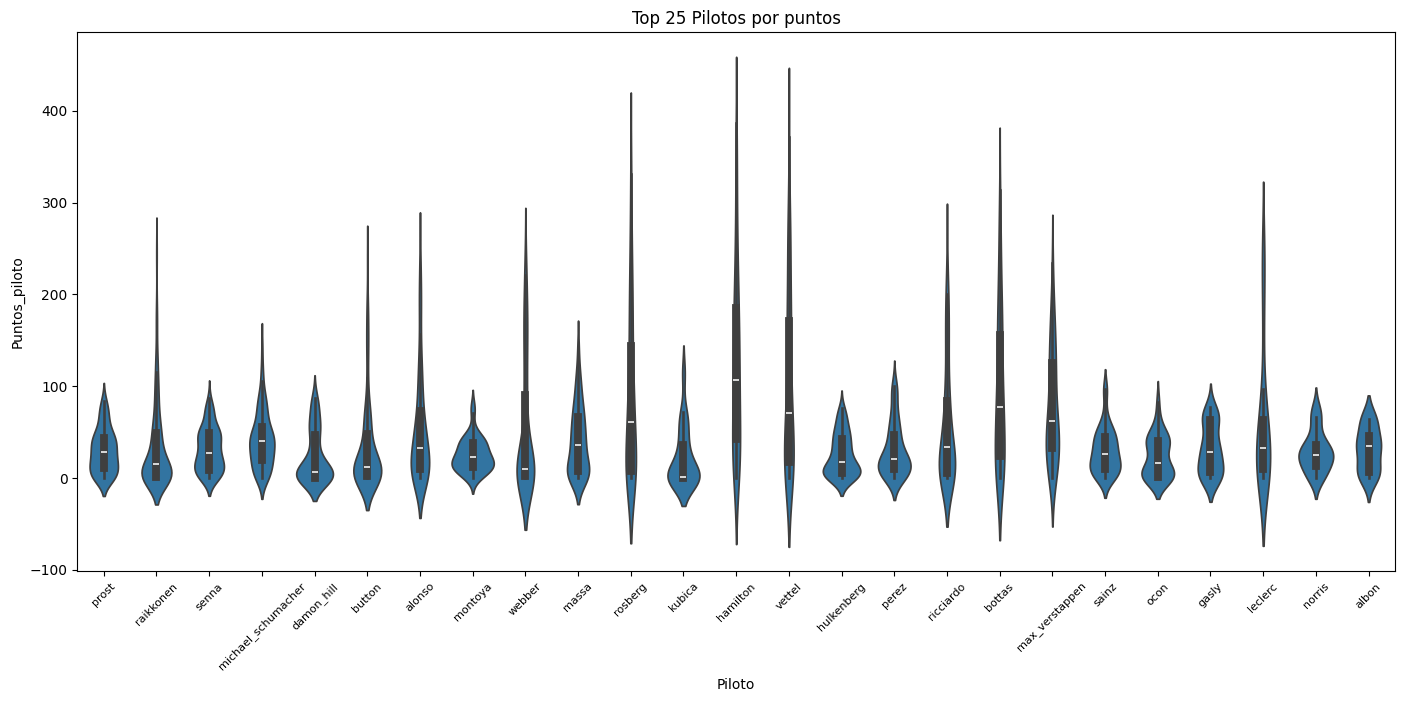

In [85]:
top_pilotos = df.groupby('Piloto')['Puntos_piloto'].mean().nlargest(25).index
df_top = df[df['Piloto'].isin(top_pilotos)]
plt.figure(figsize=(17,7))
sns.violinplot(x='Piloto', y='Puntos_piloto', data=df_top)
plt.xticks(rotation=45, fontsize=8)
plt.title("Top 25 Pilotos por puntos")
plt.show()

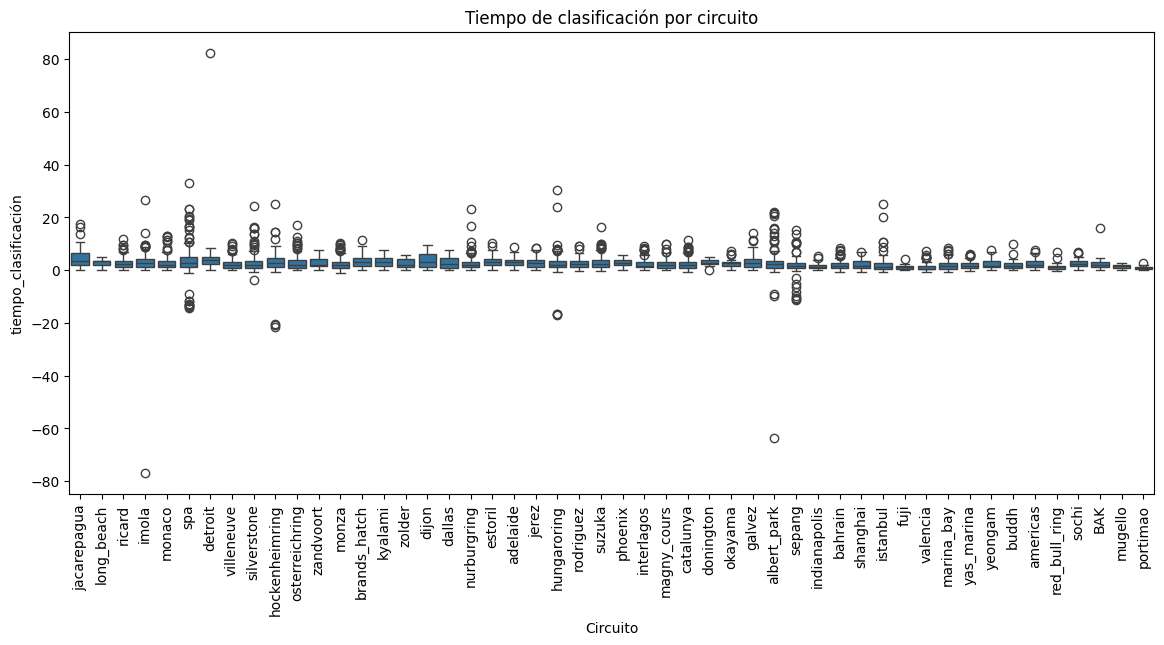

In [86]:
plt.figure(figsize=(14,6))
sns.boxplot(x='Circuito', y='tiempo_clasificación', data=df)
plt.xticks(rotation=90)
plt.title("Tiempo de clasificación por circuito")
plt.show()

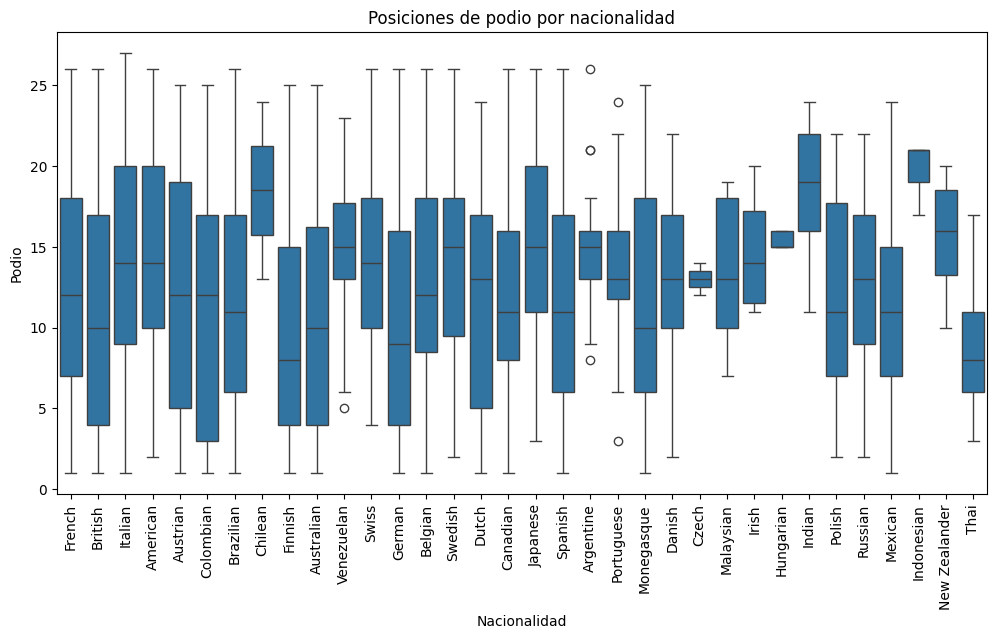

In [87]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Nacionalidad', y='Podio', data=df)
plt.xticks(rotation=90)
plt.title("Posiciones de podio por nacionalidad")
plt.show()

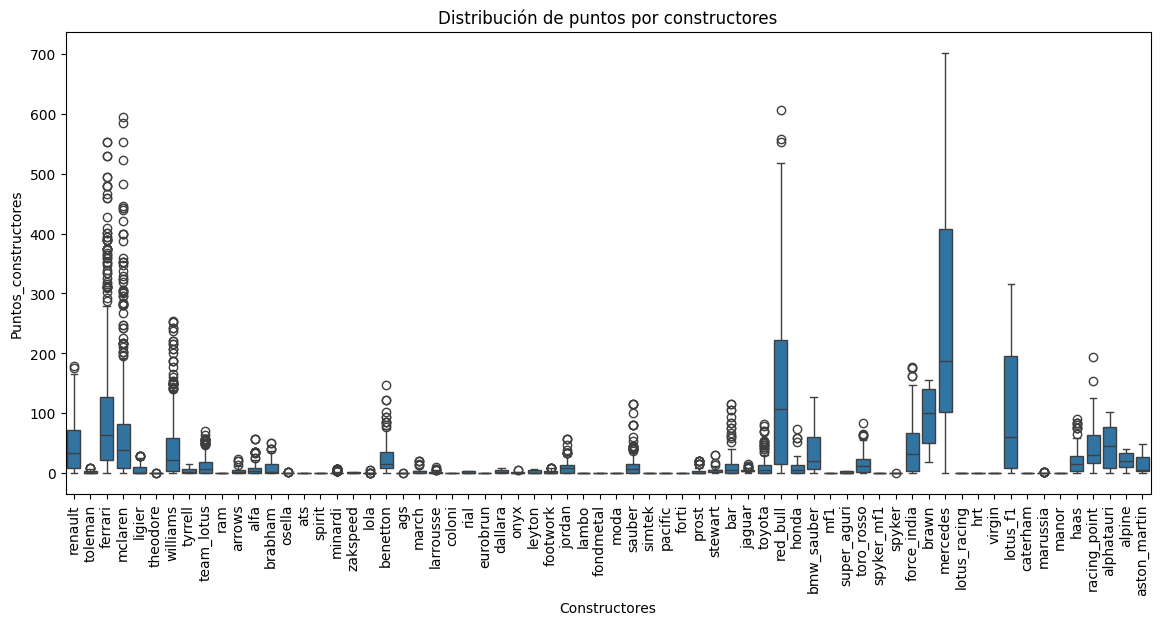

In [88]:
plt.figure(figsize=(14,6))
sns.boxplot(x='Constructores', y='Puntos_constructores', data=df)
plt.xticks(rotation=90)
plt.title("Distribución de puntos por constructores")
plt.show()

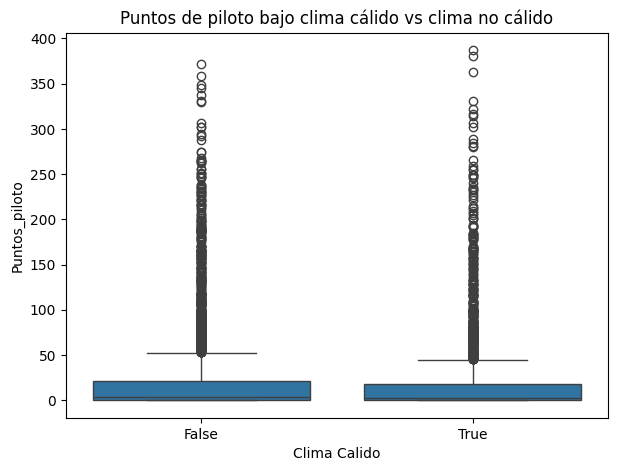

In [89]:
plt.figure(figsize=(7,5))
sns.boxplot(x='Clima Calido', y='Puntos_piloto', data=df)
plt.title("Puntos de piloto bajo clima cálido vs clima no cálido")
plt.show()